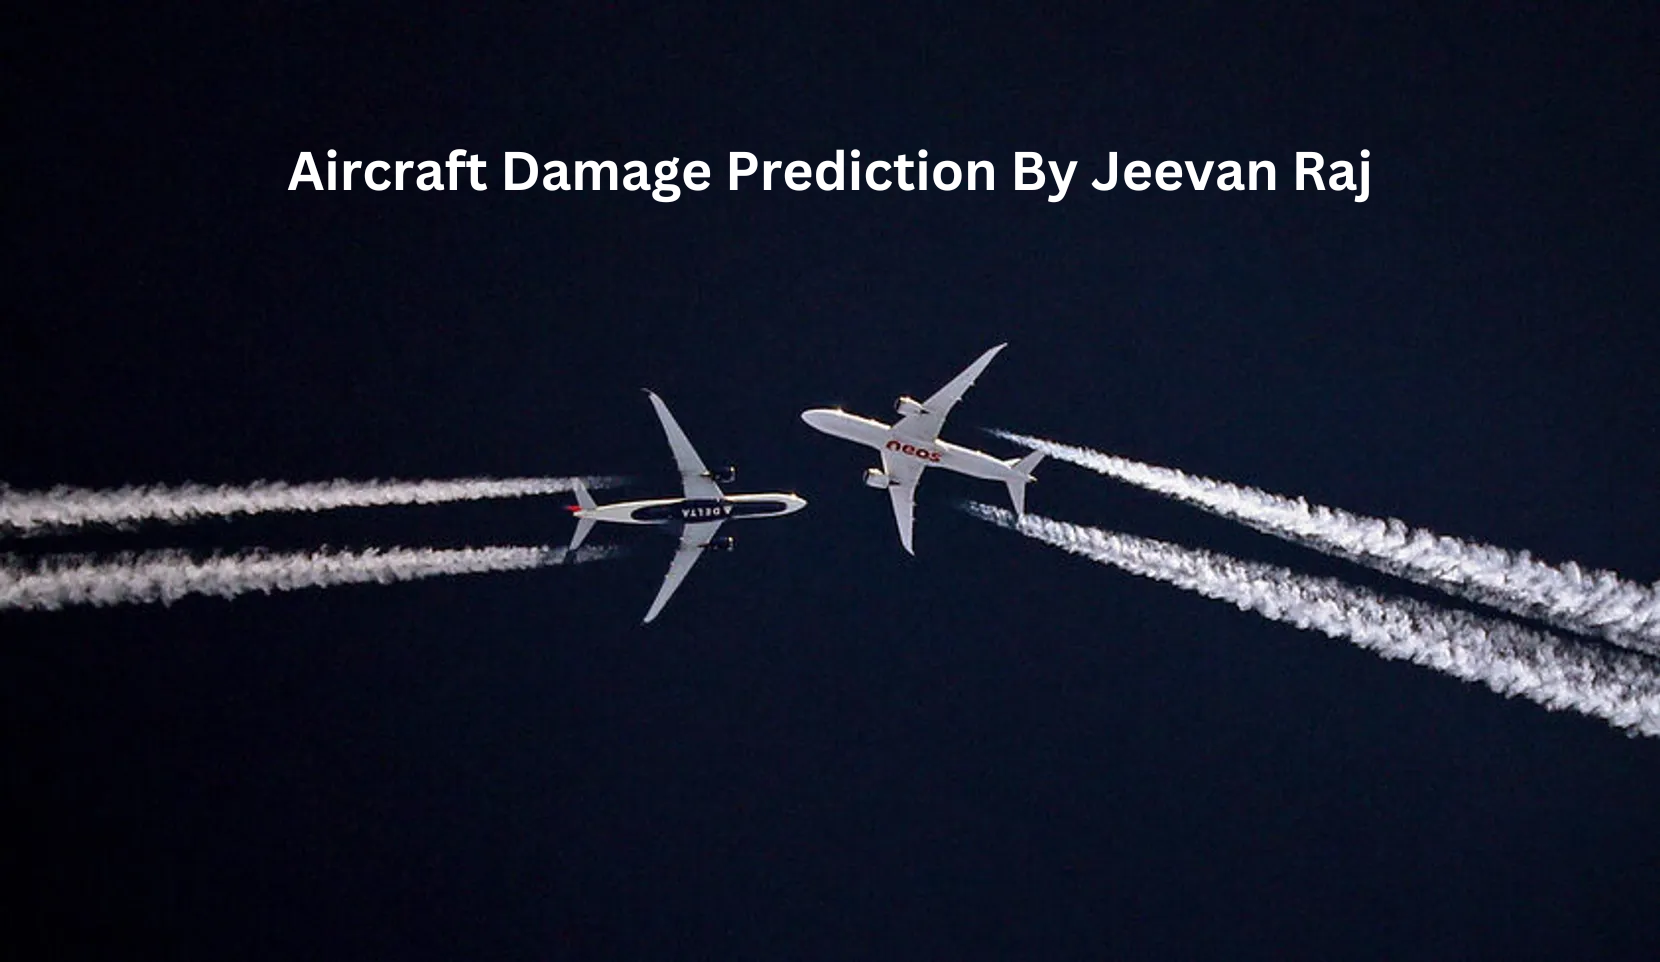

## WORK FLOW CHART

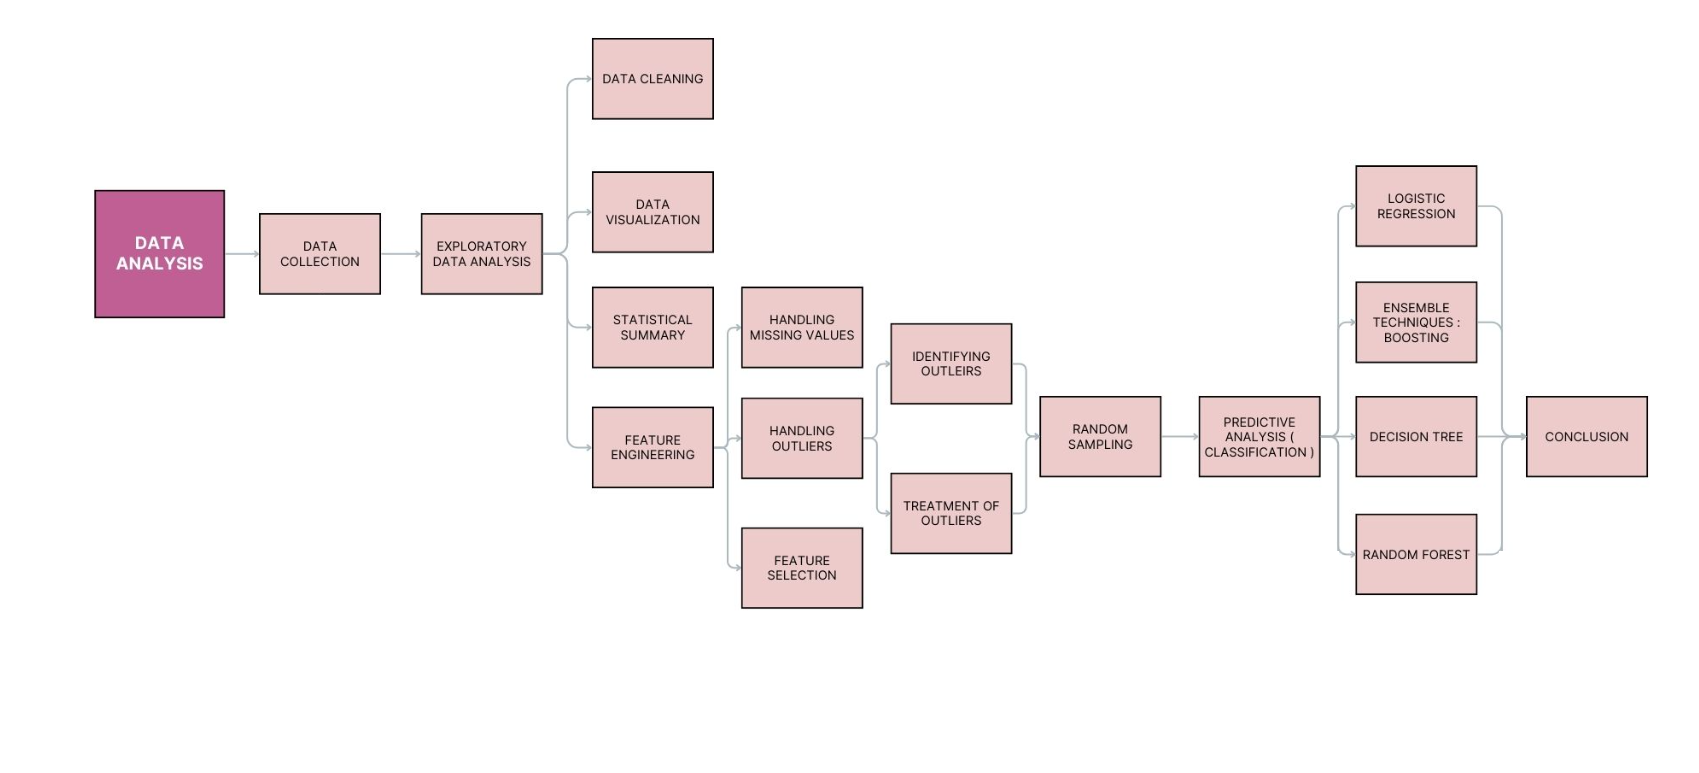

## ABOUT PROJECT

<span class="girk">- The aviation accident database synopses project, known as Aviation Data, is a comprehensive collection of data related to
  aviation accidents worldwide, providing detailed information and analysis to enhance safety and understanding within the 
  aviation industry.
 
<span class="girk"> - The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected 
  incidents within the United States, its territories and possessions, and in international waters.</span></span>
  
    - The NTSB is an independent federal agency in the United States responsible for investigating transportation 
      accidents, including those involving aviation.


## OBJECTIVE 

<span class="pirk">- The objective of the project on Aviation Accident Damage from the National Transportation Safety Board (NTSB) is to
  thoroughly investigate and analyze aviation accidents in order to understand the causes and consequences of these 
  incidents. 

        - Determine if there are any specific plane models or engine types that exhibit a higher level of risk or danger 
          in terms  of flight safety.

        - Investigate the weather conditions that have contributed to aviation accidents, aiming to understand the 
          specific factors  that lead to these incidents. 

        - Analyze the correlation between the number of engines on an aircraft and the likelihood of survivability, with 
          the goal  of determining if a higher number of engines leads to increased safety.

        - Assess which phase of a flight poses the highest level of risk or danger, considering factors such as takeoff, 
          climb,  cruise, descent, or landing.

## IMPORTING LIBRARIES

In [ ]:
!pip install catboost
!pip install xgboost

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_columns", None)

from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_validate, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score , f1_score , confusion_matrix

## IMPORTING DATA

In [5]:
# Reading the CSV file "AviationData.csv" and storing it in the variable "Aviation"

# Specifying the encoding as 'mac_roman' to handle any special characters in the file

Aviation = pd.read_csv("AviationData.csv" , encoding = 'mac_roman')

Aviation

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,Fatal,Destroyed,Airplane,N565CK,CIRRUS DESIGN CORP,SR22,N,1.0,NaN,NUSN,NaN,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,NaN,NaN,Non-Fatal,NaN,NaN,N6280F,CESSNA,172N,N,NaN,NaN,091,NaN,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,NaN,NaN,Fatal,NaN,NaN,N5798T,CESSNA,172E,N,NaN,NaN,091,NaN,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87280,20211230104454,Accident,ERA22LA097,2021-12-29,"Marathon, FL",United States,NaN,NaN,NaN,NaN,Non-Fatal,NaN,NaN,N1596U,CESSNA,207,N,NaN,NaN,135,NSCH,NaN,ExecAir,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
Aviation.shape

(87282, 31)

### DATA DESCRIPTION

In [7]:
# Create a dictionary to store the information about the dataset

info_dict = {
    
    'Column': Aviation.columns.tolist(),    # Store the column names in a list
    
    'Non-Null Count': Aviation.count().tolist(), # Store the count of non-null values for each column
    
    'Dtype': Aviation.dtypes.tolist(), # Store the data types of each column
    
    'Null_Percentage' : np.round(( 87282 - Aviation.count()) * 100 / 87282) # Calculate the percentage of null values in each column
    
}


# Create a DataFrame from the info_dict dictionary

Description = pd.DataFrame(info_dict).reset_index(drop = True)

Description

,Column,Non-Null Count,Dtype,Null_Percentage
0,Event.Id,87282,object,0.0
1,Investigation.Type,87282,object,0.0
2,Accident.Number,87282,object,0.0
3,Event.Date,87282,object,0.0
4,Location,87230,object,0.0
5,Country,87056,object,0.0
6,Latitude,33073,object,62.0
7,Longitude,33064,object,62.0
8,Airport.Code,49217,object,44.0
9,Airport.Name,51870,object,41.0


### STATISTICAL SUMMARY

In [8]:
Aviation.describe( )  ## The statistical description of the discrete variables in the data set.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# Describing the 'Aviation' DataFrame, including only object-type columns and excluding numerical columns
# include='object' specifies that we want to include only object-type columns in the description
# exclude=np.number specifies that we want to exclude numerical columns from the description

Aviation.describe(include = 'object' , exclude = np.number)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,87282,87282,87282,87282,87230,87056,33073,33064,49217,51870,86399,84272,30783,85900,87219,87190,87180,81372,30458,12330,81493,15971,83304,61724,82067,73629
unique,86370,2,87282,14435,27171,210,24752,26206,10252,24545,107,4,12,77696,8045,12185,4,10,31,3,28,13079,4,12,16666,2686
top,20001212X19172,Accident,SEA87LA080,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,83536,1,25,434,80998,19,22,1486,232,66561,62975,26343,344,22227,2350,58165,69159,17131,4284,48655,246,76251,15428,61754,17019


## EXPLORATORY DATA ANALYSIS 

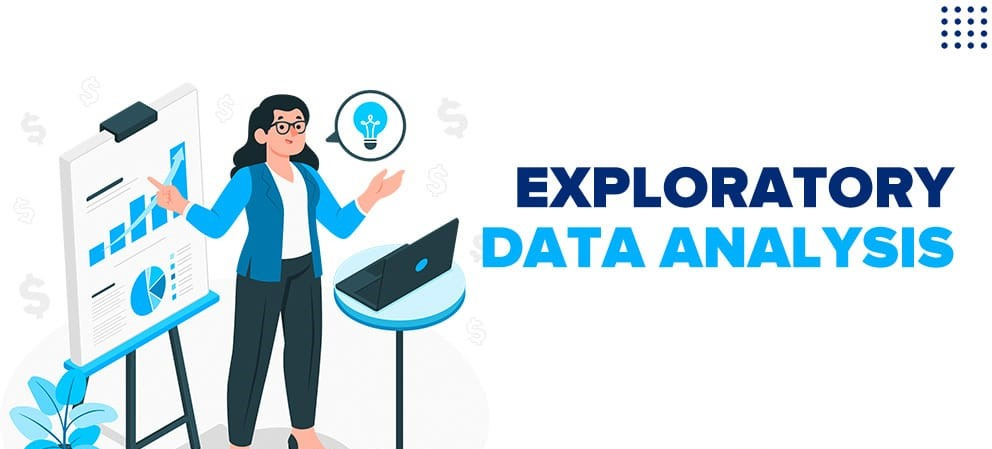

    * EDA allows us to explore the data's characteristics, patterns, and outliers, facilitating the identification of 
      crucial factors contributing to accidents. 
    
    * Through visualizations and analysis of numerical, categorical, and time-related variables, EDA allows for the 
      identification of correlations, anomalies, and potential data quality issues, providing a solid foundation for
      subsequent modeling and decision-making in the aviation industry.
      
    * EDA can uncover patterns and trends in different types of aviation accidents, such as crashes, collisions, or runway 
      incidents. It allows for the identification of common factors or circumstances contributing to these accidents, 
      including weather conditions, pilot error, mechanical failures, or specific phases of flight.

### DATA CLEANING

#### Checking for Duplicates

In [10]:
Aviation[Aviation.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


#### FILLING NULL VALUES

In [11]:
# Create an empty DataFrame to store columns and their null values

Null_Values = pd.DataFrame( ) 

# Retrieve the columns with null values and add them to the 'Columns' column of Null_Values DataFrame

Null_Values['Columns'] = Aviation.isnull( ).sum( ) [Aviation.isnull( ).sum( ) > 0].index.tolist( )

# Retrieve the corresponding null values for each column and add them to the 'Null_Values' column of Null_Values DataFrame

Null_Values['Null_Values'] = Aviation.isnull( ).sum( ) [Aviation.isnull( ).sum( ) > 0].values.tolist( )

# Displaying the percentage of null values for each column and add then to the %_of_Null_Values in Null_values DataFrame
pct_null_values = list((Aviation.isnull( ).sum( )[Aviation.isnull().sum()>0].values/Aviation.shape[0] * 100).round(2))
Null_Values['%_of_Null_Values'] = [str(i)+"%"  for i in pct_null_values]
Null_Values

,Columns,Null_Values,%_of_Null_Values
0,Location,52,0.06%
1,Country,226,0.26%
2,Latitude,54209,62.11%
3,Longitude,54218,62.12%
4,Airport.Code,38065,43.61%
5,Airport.Name,35412,40.57%
6,Injury.Severity,883,1.01%
7,Aircraft.damage,3010,3.45%
8,Aircraft.Category,56499,64.73%
9,Registration.Number,1382,1.58%


##### CATEGORICAL DATA

In [12]:
## Using Simple Imputer to fill in the null spaces with the mode values for categorical data

from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy = 'most_frequent')

Imputer.fit(Aviation.select_dtypes('object'))

DF = pd.DataFrame(Imputer.transform(Aviation.select_dtypes('object')),columns = Aviation.select_dtypes('object').columns )

In [13]:
Aviation['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.])

In [14]:
# Even Number.of.Engines is also a categorical variable so we are going to impute the missing values using most frequent values
Aviation['Number.of.Engines'].fillna(Aviation['Number.of.Engines'].mode()[0],inplace = True)

##### NUMERIC DATA

In [15]:
## Using Simple Imputer to fill in the null spaces with the mean values for the numeric data

Imputer_n = SimpleImputer(strategy = 'mean')

Imputer_n.fit(Aviation.select_dtypes(np.number))

DF_1 = pd.DataFrame(Imputer_n.transform(Aviation.select_dtypes(np.number)),columns = Aviation.select_dtypes(np.number).columns)

##### CONCATENATING THE CLEANING DATA FRAME

In [16]:
Aviation = pd.concat([DF,DF_1],axis = 1)
Aviation

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,Reciprocating,091,NSCH,Personal,Pilot,UNK,Cruise,Probable Cause,25-09-2020,1.0,2.0,0.000000,0.000000,0.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,Reciprocating,091,NSCH,Personal,Pilot,UNK,Unknown,Probable Cause,19-09-1996,1.0,4.0,0.000000,0.000000,0.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,Reciprocating,091,NSCH,Personal,Pilot,IMC,Cruise,Probable Cause,26-02-2007,1.0,3.0,0.280921,0.360814,5.311847
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,Reciprocating,091,NSCH,Personal,Pilot,IMC,Cruise,Probable Cause,12-09-2000,1.0,2.0,0.000000,0.000000,0.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Approach,Probable Cause,16-04-1980,1.0,1.0,2.000000,0.360814,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NONE,Private,Fatal,Destroyed,Airplane,N565CK,CIRRUS DESIGN CORP,SR22,N,Reciprocating,NUSN,NSCH,Unknown,Pilot,VMC,Landing,Probable Cause,25-09-2020,1.0,1.0,0.000000,0.000000,0.000000
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,N6280F,CESSNA,172N,N,Reciprocating,091,NSCH,Positioning,"Fox Two, LLC",VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,0.000000,1.000000,0.000000
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,332739N,0112457W,NONE,Private,Fatal,Substantial,Airplane,N5798T,CESSNA,172E,N,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020,1.0,2.0,0.000000,0.000000,0.000000
87280,20211230104454,Accident,ERA22LA097,2021-12-29,"Marathon, FL",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,N1596U,CESSNA,207,N,Reciprocating,135,NSCH,Personal,ExecAir,VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,3.000000,0.000000,0.000000


In [17]:
# Checking for null values

Aviation.isnull().sum()[Aviation.isnull().sum()>0]

Series([], dtype: int64)

Finally we have treated all the missing values

### DATA VISUALIZATION

#### EVENTS THROUGHOUT THE YEAR

    - The x-axis would show the years, and the y-axis would represent the count or identification numbers of the aviation
      events or accidents. 

    - The line plot can provide insights into the trends and variations in accident occurrences over time.

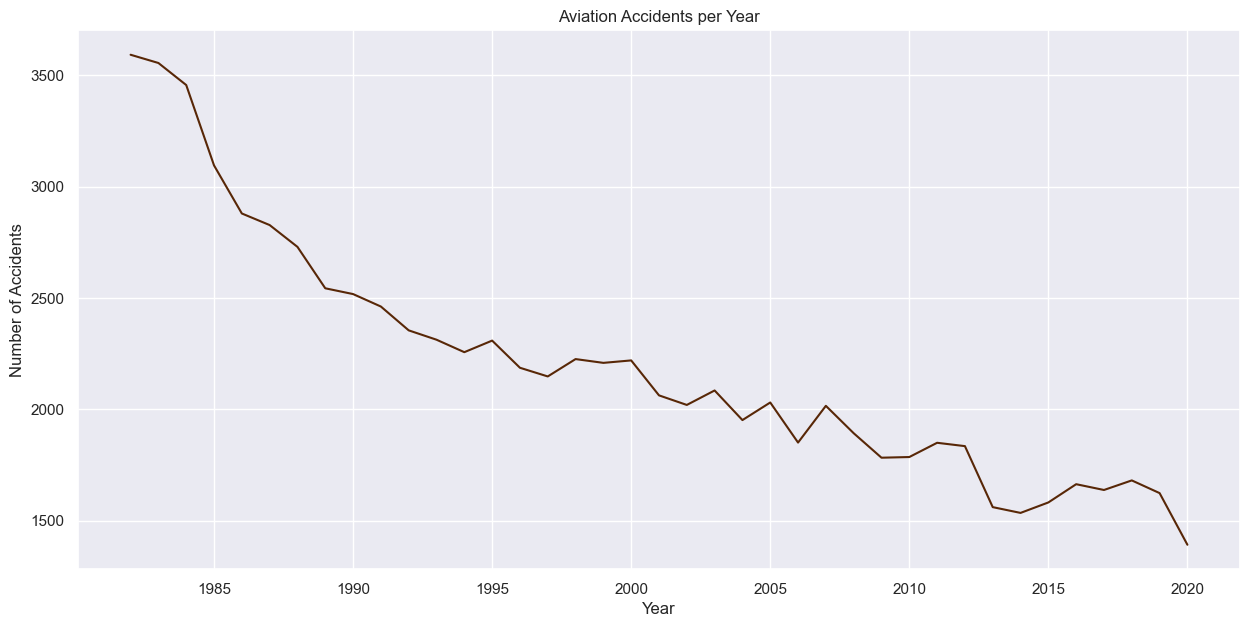

In [18]:
# Converting the Event Date column type from String > DateTime

Aviation['Event.Date'] = pd.to_datetime(Aviation['Event.Date'])


# Extracting Year from the transformed column of Event.Date and storing it in another column in the same Data Frame

Aviation['Year'] = Aviation['Event.Date'].dt.year


# Grouping the Aviation Dataset by Year and storing the Event.Id column from grouped data into a surrogate data frame

Accidents = Aviation.groupby(['Year'], as_index = False)['Event.Id'].count()


# Filtering the column Year from Accidents Dataframe 

Accidents = Accidents[(Accidents['Year'] >= 1982) & (Accidents['Year'] <= 2020)]


# Specifying the style and visualization aesthetics

plt.style.use("seaborn-dark")

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid')


# Create the line plot

sns.lineplot(x = 'Year', y = 'Event.Id', data = Accidents, color = '#582707' , markers = '*' )

# Add labels and title

plt.xlabel('Year')

plt.ylabel('Number of Accidents')

plt.title('Aviation Accidents per Year')

plt.show( )

<span class="burk"> --INFERENCE-- </span>

        * We can see that the number of accidents per year gradually decrease from 1982 to 2020, with peaks and valleys.

        * The decreasing trend suggests advancements in aircraft technology, maintenance, pilot training, and safety 
          regulations.
          
        * Efforts to learn from past accidents and implement proactive measures contribute to the trend.

#### MONTHLY ANALYSIS OF ACCIDENTS

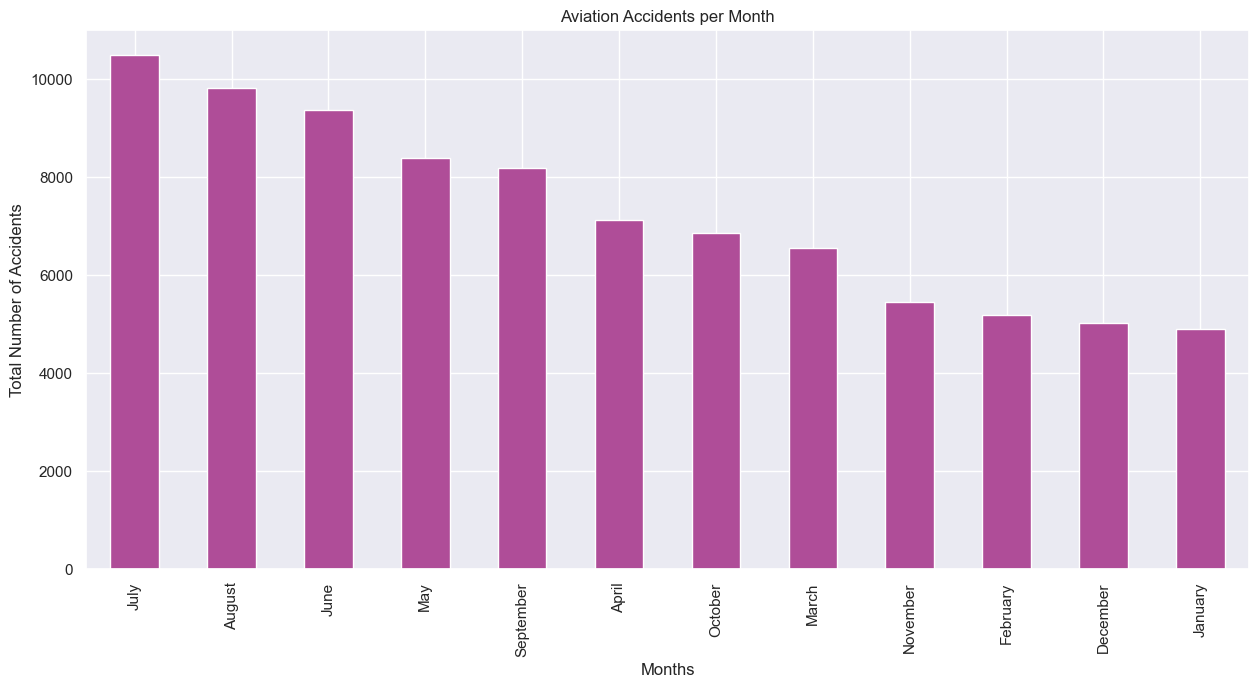

In [19]:
# Extracting Month Name from Event.Date and saving it as Month.Abbr > Abbreviations of the months

Aviation['Month.Abbr'] = Aviation['Event.Date'].dt.month_name()


# Specifying the style and visualization aesthetics

plt.style.use("seaborn-dark")

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid')


# Creating a plot

Aviation['Month.Abbr'].value_counts( ).sort_values(ascending = False).plot(kind = 'bar',color = '#AF4D98')

plt.xlabel('Months')

plt.ylabel('Total Number of Accidents')

plt.title('Aviation Accidents per Month')

plt.show( )

<span class="burk"> --INFERENCE-- </span>


        * We can see that the maximum number of accidents occur in the month of July, August, June and May, followed by 
        September and April.

            - More accidents occur during summer months, likely due to increased travel and challenging weather 
              conditions.

            - Factors unique to summer months contribute to a higher frequency of accidents.

        * The least number of accidents are recorded in the month of December , November , January and February.

            - The information helps aviation authorities, airlines, and travelers improve safety measures.
            
            - It aids in allocating resources effectively.
            
            - It promotes awareness during periods with higher accident rates.
            


#### WEEKLY ANALYSIS OF ACCIDENTS

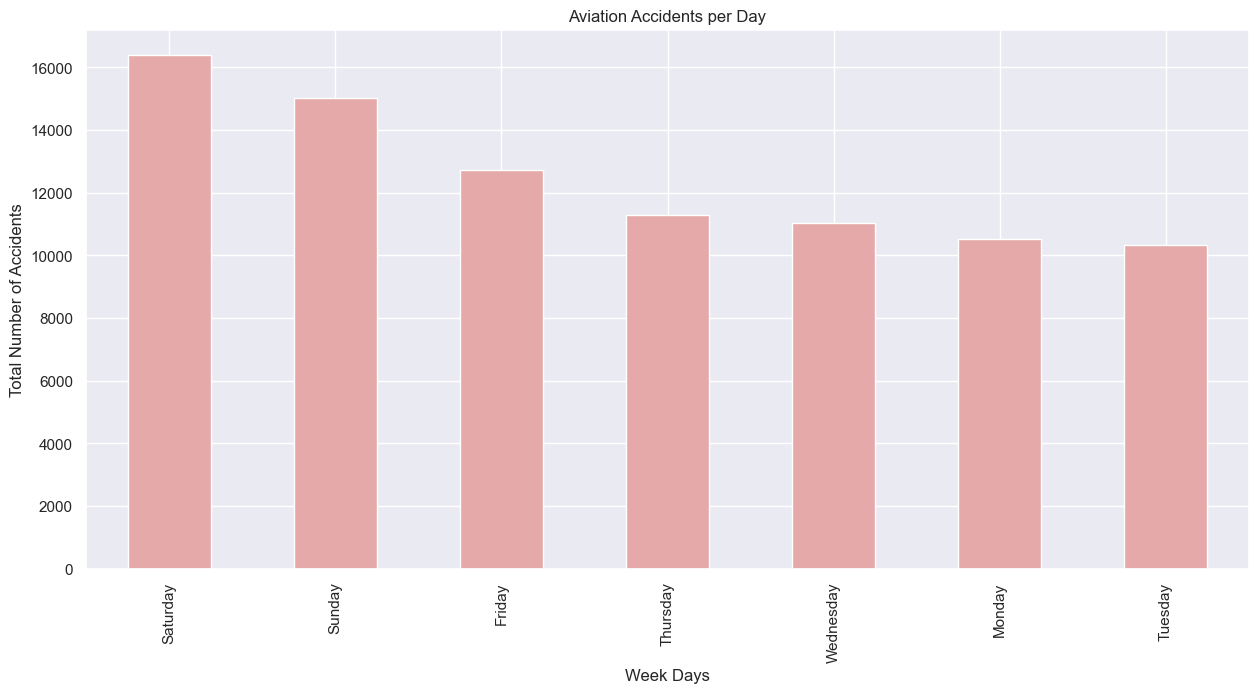

In [20]:
# Specifying the style and visualization aesthetics

plt.style.use( "seaborn-dark" )

plt.figure(figsize = (15,7))

sns.set(style = 'darkgrid')


# Extracting the name of the weekdays from Event.Date and saving it as Week column in the Aviation data set

Aviation['Week'] = Aviation['Event.Date'].dt.day_name( )


# Creating the plot

Aviation['Week'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = '#E5A9A9')

plt.xlabel('Week Days')

plt.ylabel('Total Number of Accidents')

plt.title('Aviation Accidents per Day')

plt.show( )

<span class="burk"> --INFERENCE-- </span>

    * Maximum accidents occur of Saturday and Sunday
    
    * Increased recreational activities and leisure flying on weekends.
    
    * Potential pilot fatigue from irregular work schedules and longer duty hours.
    
    * Higher passenger loads and crowded airports during weekend travel.

#### ACCIDENTS PER AVIATION PHASE OF FLIGHT

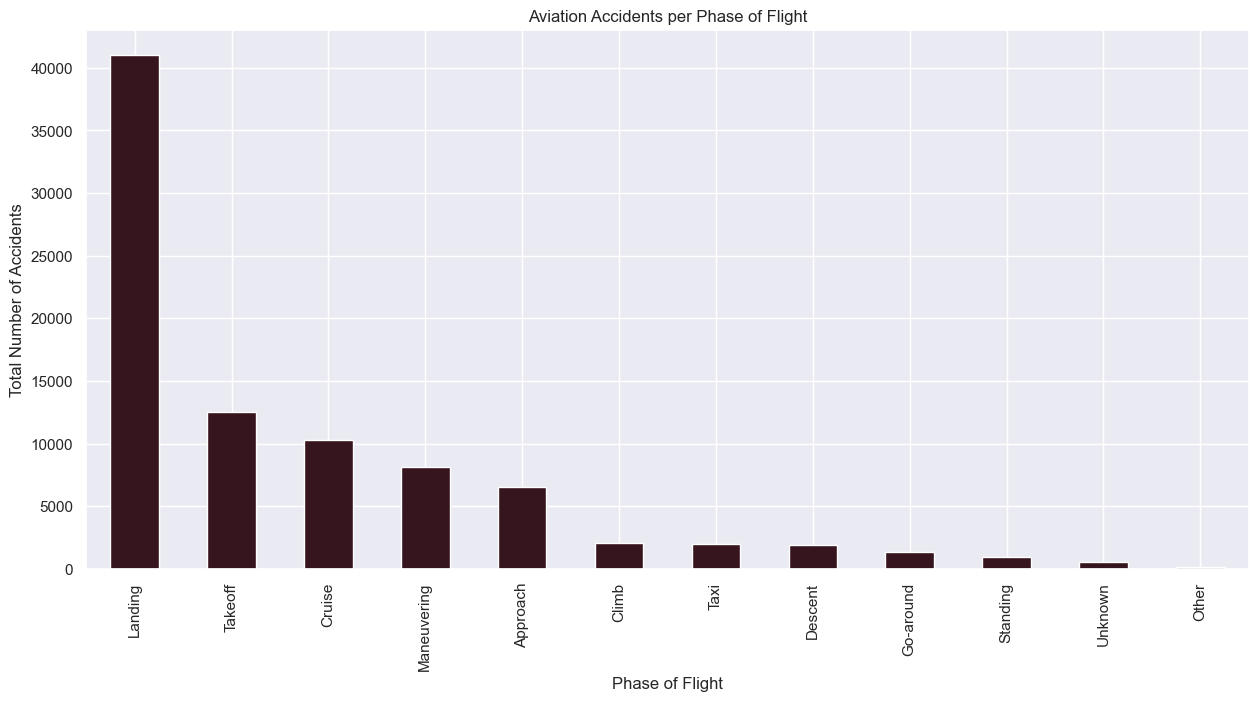

In [21]:
# Specifying the style and visualization aesthetics

plt.style.use("seaborn-dark")

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid')


# Creating the plot 

Aviation['Broad.phase.of.flight'].value_counts( ).sort_values(ascending = False).plot(kind = 'bar', color = '#36151E')

plt.xlabel('Phase of Flight')

plt.ylabel('Total Number of Accidents')

plt.title('Aviation Accidents per Phase of Flight')

plt.show( )

<span class="burk"> --INFERENCE-- </span>


    * We can see that the maximum number of accidents occur during the Landing phase and Take off phase, followed by 
      cruise, maneuvering and approach.
      
    * Takeoff and landing phases are critical due to complex maneuvers and proximity to the ground.
    
    * Runway conditions impact takeoff and landing safety.
    
    * These phases have a higher risk compared to other flight phases.
    
    * Ongoing vigilance is necessary during the cruise phase to prevent accidents during stable flight.
    

#### DAMAGE TYPE & WEATHER CONDITIONS

In [22]:
Aviation['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unk'], dtype=object)

array([<Axes: ylabel='proportion'>], dtype=object)

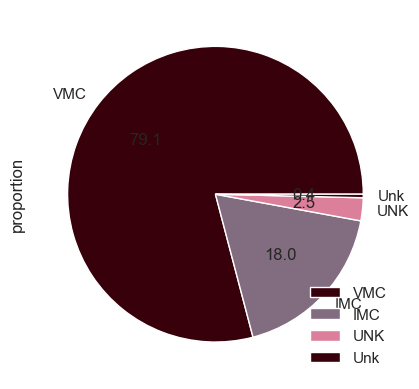

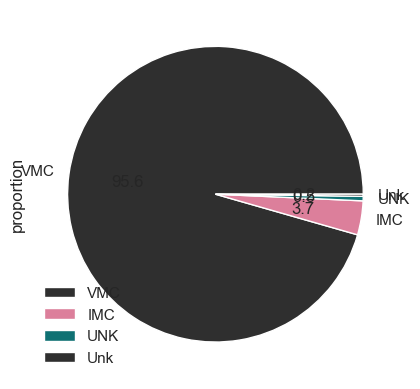

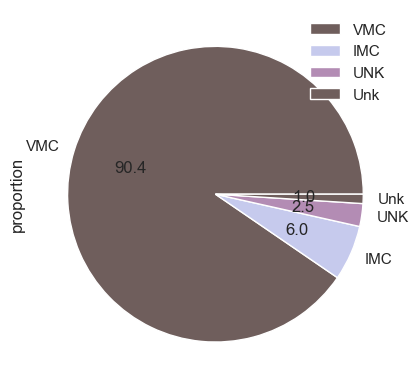

In [23]:
# Creating a DataFrame to store the normalized value counts of Weather.Condition grouped by Aircraft.damage

Weather_Damage = pd.DataFrame(Aviation['Weather.Condition'].groupby(Aviation['Aircraft.damage']).value_counts (normalize = True) * 100)


# Plotting pie chart for the 'Destroyed' category

Weather_Damage.loc['Destroyed', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = ['#37000A' , '#826C7F' , '#DC7F9B'])


# Plotting pie chart for the 'Substantial' category

Weather_Damage.loc['Substantial', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = ['#2F2F2F' , '#DC7F9B' , '#0F7173'])


# Plotting pie chart for the 'Minor' category

Weather_Damage.loc['Minor', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = ['#6F5E5C' , '#C6CAED' , '#B38CB4'])



    * 79.1 percent of aircrafts which have been destroyed in the accidents were in visual Meteorological operations (VMC), 
      indicating a region with predominantly clear weather. 

    * 95.6 percent of aircrafts which have been substantially affected in the accidents were in visual flight operations
      (VMC )
      
    * 90.4 percent of aircrafts which have suffered minor destruction in the accidents were in visual flight operations
      (VMC).
      
    Reasons
    
        1. More aircraft in the sky during clear weather means a higher probability of accidents occurring, which can 
           result in a higher number of aircraft being destroyed.
        
        2. Pilots may perceive clear weather conditions as low-risk situations and may be more inclined to take risks or
           engage in more aggressive flying maneuvers. This behavior could increase the probability of accidents happening,
           leading to a higher proportion of destroyed aircraft.

#### DAMAGE SUSTAINED

<BarContainer object of 3 artists>

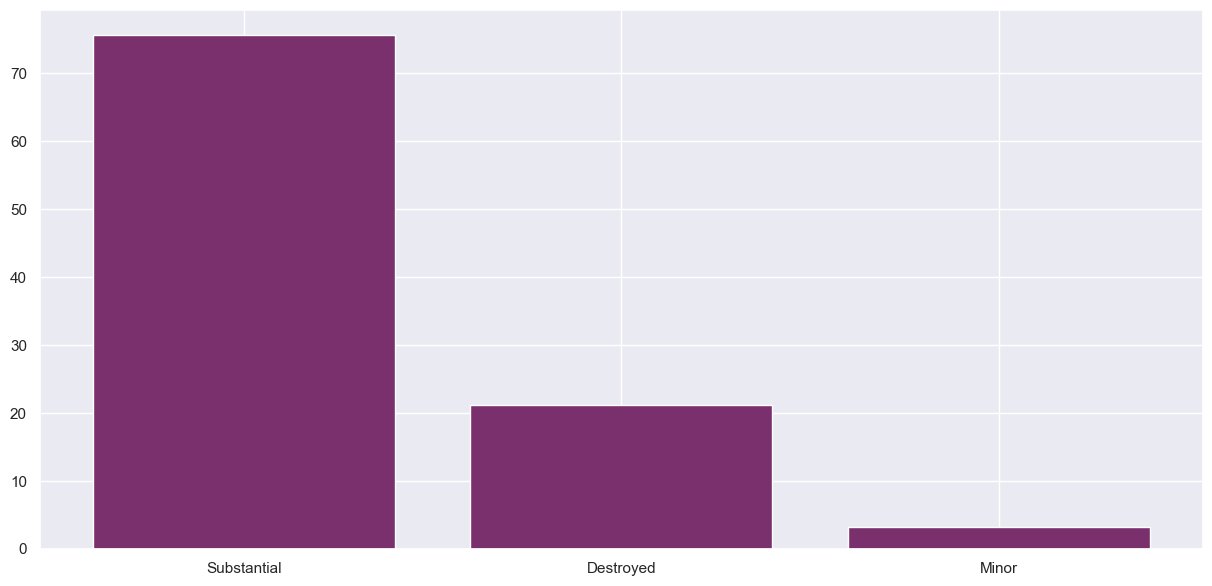

In [24]:
# Creating a surrogate dataframe for representing the Damage recorded in graphical format, since it is 
# categorical & has only 3 values

Damage = pd.DataFrame( )

Damage['Damage_Sustained'] = (Aviation['Aircraft.damage'].value_counts(normalize = True) * 100).index 

Damage['Values'] = (Aviation['Aircraft.damage'].value_counts(normalize = True) * 100).values 


# Specifying the style and visualization aesthetics

plt.style.use("seaborn-dark")

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid')


# Plotting the bar chart

plt.bar(x = Damage.Damage_Sustained [ 0 : 3 ] , height = Damage.Values [ 0 : 3 ] , color = '#7A306C')


#### INJURIES OVER YEARS

In [25]:
Aviation[Aviation['Investigation.Type']=='Incident']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month.Abbr,Week
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,332739N,0112457W,VNY,VAN NUYS,Incident,Minor,Airplane,N5018P,Piper,PA-24-180,No,Reciprocating,Part 91: General Aviation,NSCH,Personal,Pilot,VMC,Approach,Probable Cause,03-01-1983,1.0,0.0,0.0,0.0,1.0,1982,January,Sunday
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,332739N,0112457W,NONE,Private,Incident,Minor,Airplane,N5782N,Rockwell,114,No,Reciprocating,Part 91: General Aviation,NSCH,Business,Pilot,VMC,Cruise,Probable Cause,05-01-1983,1.0,0.0,0.0,0.0,1.0,1982,January,Tuesday
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,332739N,0112457W,ORD,CHICAGO O'HARE INTER'L,Incident,Substantial,Airplane,N31031,Lockheed,L-1011,No,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,Trans World Airlines,UNK,Cruise,Probable Cause,12-01-1983,3.0,0.0,0.0,0.0,149.0,1982,January,Tuesday
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,332739N,0112457W,CKB,BENEDUM,Incident,Minor,Airplane,N615KC,Embraer,EMB-110P1,No,Turbo Prop,Part 135: Air Taxi & Commuter,SCHD,Unknown,Aeromech Incorporated,VMC,Taxi,Probable Cause,12-01-1983,2.0,0.0,0.0,0.0,2.0,1982,January,Tuesday
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,332739N,0112457W,IAD,Private,Incident,Minor,Airplane,N9240N,De Havilland,DHC-6-300,No,Turbo Prop,Part 91: General Aviation,NSCH,Ferry,Pilot,IMC,Descent,Probable Cause,19-01-1983,2.0,0.0,0.0,0.0,1.0,1982,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87207,20211221104430,Incident,ENG22WA005,2021-11-22,"Owerri, Nigeria",Nigeria,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,5N-BUQ,BOEING,737,N,Reciprocating,NUSC,NSCH,Personal,Air Peace Limited,VMC,Landing,Probable Cause,25-09-2020,2.0,0.0,0.0,0.0,0.0,2021,November,Monday
87215,20211129104327,Incident,DCA22WA035,2021-11-25,"Bogata, Colombia",Colombia,004426N,0074849W,BOG,El Dorado International Airpor,Non-Fatal,Minor,Airplane,N1604R,BOEING,767-332,N,Reciprocating,121,NSCH,Personal,DELTA AIR LINES INC,VMC,Landing,Probable Cause,25-09-2020,2.0,0.0,0.0,0.0,206.0,2021,November,Thursday
87229,20211207104357,Incident,DCA22WA039,2021-12-01,"Kuusamo, Finland",Finland,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,G-JZHL,BOEING,737,N,Reciprocating,NUSC,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,0.0,0.0,0.0,2021,December,Wednesday
87266,20211220104425,Incident,DCA22WA051,2021-12-13,"West Sumatera, Indonesia",Indonesia,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,PK-LQR,BOEING,737,N,Reciprocating,129,SCHD,Personal,PT. Lion Mentari Airlines,VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,0.0,0.0,203.0,2021,December,Monday


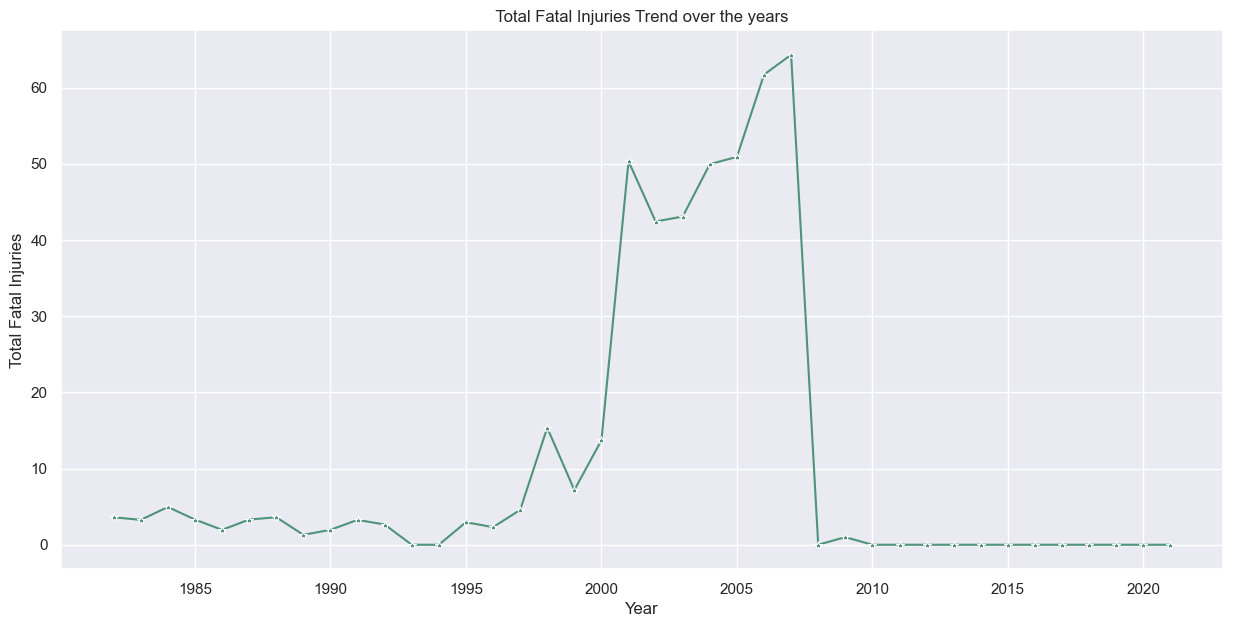

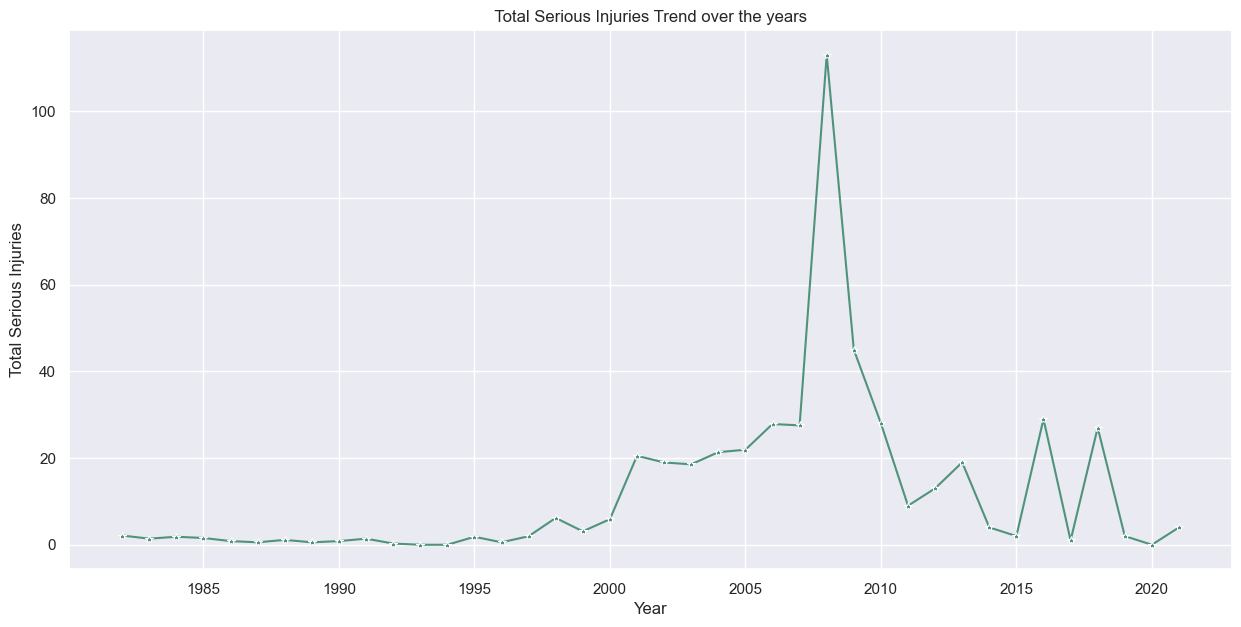

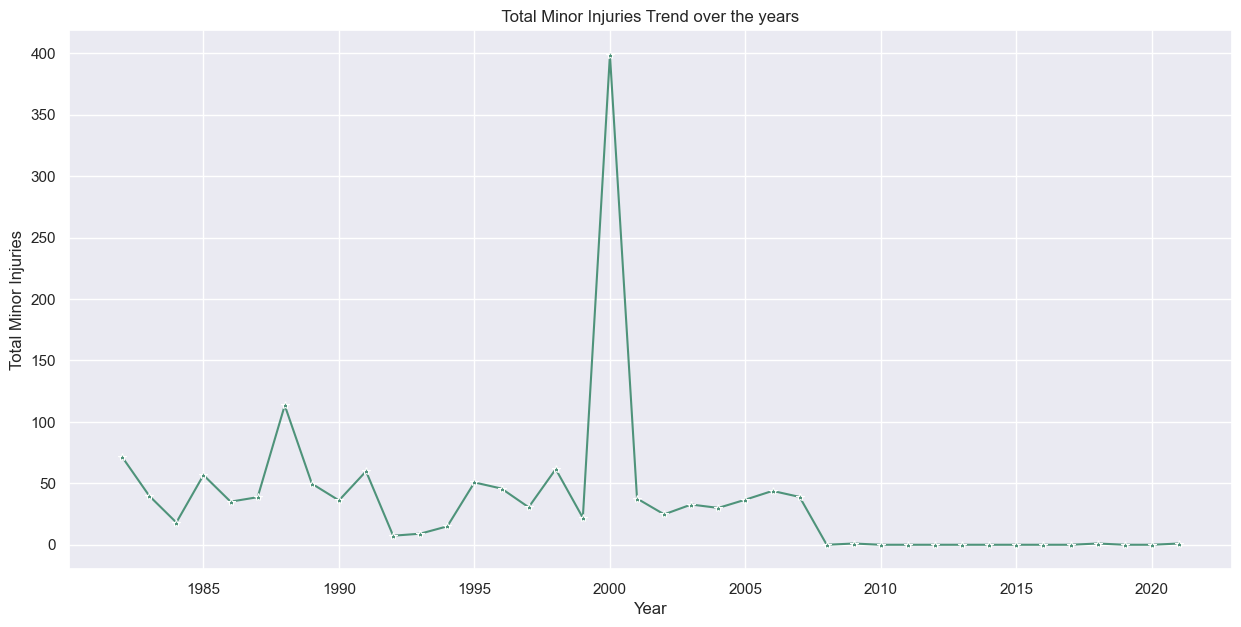

In [26]:
# Creating a separate dataframe to save the Injuries associated with Incident Type

# This is done to see how much injuries were sustained during the incidents

# It is grouped Year wise

Incident = Aviation[Aviation['Investigation.Type']=='Incident']

Incident_injuries = Incident.groupby('Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()


# Plotting the graphs for each kind of injuries over the years

for i in ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries'] :
    
    plt.figure(figsize = ( 15 , 7 ))

    sns.lineplot(x = 'Year' , y =  i , data = Incident_injuries , color = '#4E937A' , marker = '*')
    
    plt.xlabel('Year')
    
    plt.ylabel(' '.join(i.split( '.' )))
    
    plt.title(" {} Trend over the years ".format(' '.join(i.split( '.' ))))

    * A spike in Total Fatal Injuries have been recorded in between the year 2000 to 2008.
    
        - It could indicate a potential issue in safety measures or an increase in high-risk activities during that time.
    
    * A spike in Total Serious Injuries have been recorded in between the year 2007 to 2010.
    
        - Similar to the first insight, this could signify a temporary lapse in safety measures or a higher occurrence of
          risky situations
    
    * A spike in Total Minor Injuries have been recorded in between the year 1998 to 2002.
    
        - It might imply that there were more incidents with less severe consequences during this period, but still
          requiring medical attention or treatment.

#### FATALITIES BASED ON ENGINE TYPE

<Axes: xlabel='Engine.Type', ylabel='Total.Fatal.Injuries'>

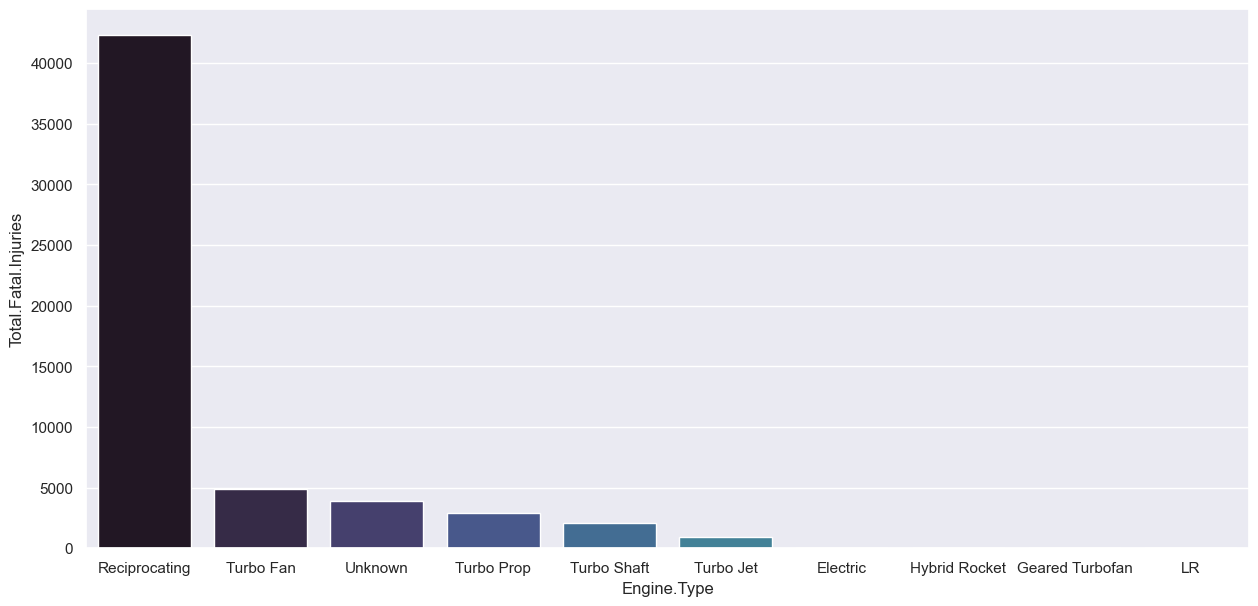

In [27]:
# Plotting the graph of Engine Type and Fatal Injuries recorded for each kind.

plt.figure(figsize = ( 15 , 7 ))

sns.barplot(x = 'Engine.Type',y='Total.Fatal.Injuries', data = Aviation.groupby("Engine.Type")['Total.Fatal.Injuries'].sum().reset_index().sort_values(by = ['Total.Fatal.Injuries'], ascending= False) , palette = 'mako')

    * Maximum number of fatalities are associated with the Reciprocating engine type
    
        Reciprocating engines are commonly used in smaller aircraft, which are more prone to accidents and have fewer 
        safety features, resulting in a higher number of fatalities in those incidents.
    
    * Followed by Turbofan
    
        Turbofan engines are typically used in commercial airliners, which carry a larger number of passengers. 
        
        In the event of an accident, the higher passenger capacity of these aircraft can contribute to a higher number of 
        fatalities.
    
    * But is it noticed that Turbojet engines have the least amount of fatalities
    
        Turbojet engines are generally used in supersonic military aircraft or high-performance jets. 
        
        These aircraft often have advanced safety systems and are designed for specific missions, which may reduce the
        occurrence of accidents and resulting fatalities.

#### DAMAGE TYPE & NUMBER OF ENGINES 

array([<Axes: ylabel='count'>], dtype=object)

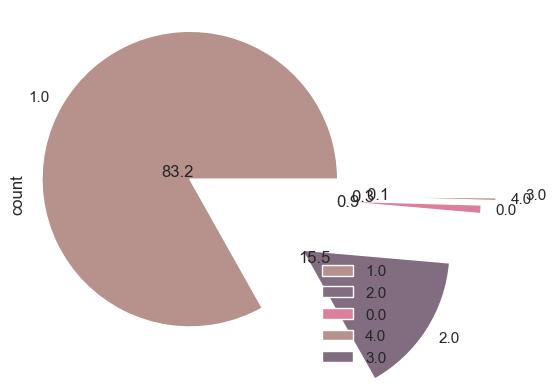

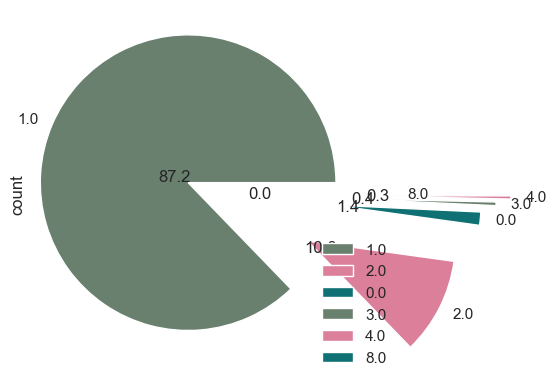

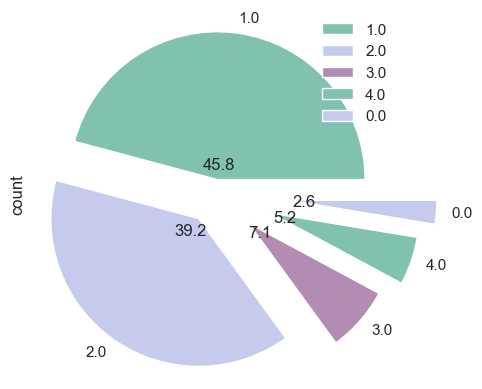

In [28]:
Engine_Damage = pd.DataFrame(Aviation['Number.of.Engines'].groupby(Aviation['Aircraft.damage']).value_counts ( ))

# Plotting the first pie chart for 'Destroyed' category

explode_values = [0.2, 0.7, 0.8, 0.9 , 1.0 ]  # Adjust the explode values as needed

Engine_Damage.loc['Destroyed', :].plot(
    
    kind = 'pie',
    
    subplots = True,
    
    autopct = '%.1f',
    
    colors = ['#B7918C', '#826C7F', '#DC7F9B'],
    
    explode = explode_values ,  pctdistance = 0.1 )# Adjust the distance of data labels from the center of each pie slice



explode_values = [0.2, 0.7, 0.8, 0.9, 1 , 0.2 ]

Engine_Damage.loc['Substantial', :].plot(
   
    kind = 'pie',
   
    subplots = True,
   
    autopct = '%.1f',
   
    colors = ['#6A806E', '#DC7F9B', '#0F7173'],
   
    explode = explode_values ,  pctdistance = 0.1 )


explode_values = [0.1, 0.2, 0.3, 0.4, 0.5]

Engine_Damage.loc['Minor', :].plot(kind = 'pie',
                                  
                                   subplots = True,
                                  
                                   autopct = '%.1f',
                                  
                                   colors = ['#80C2AF', '#C6CAED', '#B38CB4'],
                                  
                                   explode = explode_values ,  pctdistance = 0.1 )

    * 83.2 percent of the aircrafts that have been destroyed in the accidents had one engine

    * 87.2 percent of the aircrafts that suffered substantial effects had one engine

    * 45.8 percent of the aircrafts that suffered minor effects had one engine

    * We can see that as the number of engines increase, they get less into accidents and are relatively safer

    - REASONS

         * Multiple engines provide redundancy, meaning that if one engine fails, the remaining engines can compensate for
           the loss of power. 

         * This redundancy improves the overall reliability and safety of the aircraft. In contrast, a single-engine 
           aircraft has a higher risk of accidents in the event of engine failure.

         *  Multi-engine aircraft, especially those with more advanced engines, often offer better performance 
            characteristics such as higher thrust, better fuel efficiency, and improved climb rates. 

         * These performance advantages contribute to better operational capabilities and increased safety margins.

### DATA TRANSFORMATION : CATEGORICAL TO NUMERIC

In [29]:
## Dropping Columns that don't contribute to the data set

Drop = ['Publication.Date','Report.Status','FAR.Description','Model','Accident.Number','Registration.Number' ,'Latitude','Longitude']

Aviation.drop(columns = Drop , axis = 1 , inplace = True )

In [30]:
## Replacing the Unknown Values with Mode 

for i in Aviation:
    
    if Aviation[i].dtype == 'object' : 
        
        Aviation[i] = Aviation[i].str.title( )
        
        if 'Unknown' in Aviation[i].values: 
            
            Aviation[i].replace({'Unknown' : Aviation[i].mode( )[0]}, inplace = True)
            

### Encoding for Target Variable

In [31]:
Aviation['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor'], dtype=object)

In [32]:
# Replacing the values in target variables 

Aviation['Aircraft.damage'].replace({'Substantial' : 1 , 'Minor' : 0 , 'Destroyed' : 2 } ,inplace = True)

In [33]:
# Extracting catrgorical data

Categorical_Data = Aviation.select_dtypes('object').columns.to_list ( )
Categorical_Data

['Event.Id',
 'Investigation.Type',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.Category',
 'Make',
 'Amateur.Built',
 'Engine.Type',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Month.Abbr',
 'Week']

In [34]:
## Using Label encoding to convert all the categorical variables to numeric variables

## There is no inherent order noticed in the categorical variables that has a direct impact on the target variable

LE = LabelEncoder ( )

Aviation[Categorical_Data] = Aviation[Categorical_Data].apply(LE.fit_transform )

In [35]:
Aviation

,Event.Id,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month.Abbr,Week
0,45208,0,1948-10-24,12645,195,7727,15407,42,2,0,6421,1,4,0,19,9080,1,2,1.0,2.0,0.000000,0.000000,0.000000,1948,10,3
1,45211,0,1962-07-19,2281,195,7727,15407,68,2,0,5153,1,4,0,19,9080,1,5,1.0,4.0,0.000000,0.000000,0.000000,1962,5,4
2,60529,0,1974-08-30,16922,195,7727,15407,60,2,0,1226,1,4,0,19,9080,0,2,1.0,3.0,0.280921,0.360814,5.311847,1974,1,0
3,45212,0,1977-06-19,5997,195,7727,15407,42,2,0,5642,1,4,0,19,9080,0,2,1.0,2.0,0.000000,0.000000,0.000000,1977,6,3
4,56803,0,1979-08-02,2891,195,7727,15407,1,2,0,1226,1,4,0,19,9080,2,0,1.0,1.0,2.000000,0.360814,0.000000,1979,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,86364,0,2021-12-21,1026,195,7727,15407,0,2,0,1321,0,4,0,19,9080,2,5,1.0,1.0,0.000000,0.000000,0.000000,2021,2,5
87278,86368,0,2021-12-22,969,195,7727,15407,105,1,0,1226,0,4,0,20,4794,2,5,1.0,0.0,0.000000,1.000000,0.000000,2021,2,6
87279,86366,0,2021-12-26,7934,195,7727,15407,0,1,0,1226,0,4,0,19,9080,2,5,1.0,2.0,0.000000,0.000000,0.000000,2021,2,3
87280,86369,0,2021-12-29,11516,195,7727,15407,105,1,0,1226,0,4,0,19,4370,2,5,1.0,0.0,3.000000,0.000000,0.000000,2021,2,6


### HEATMAP

<Axes: >

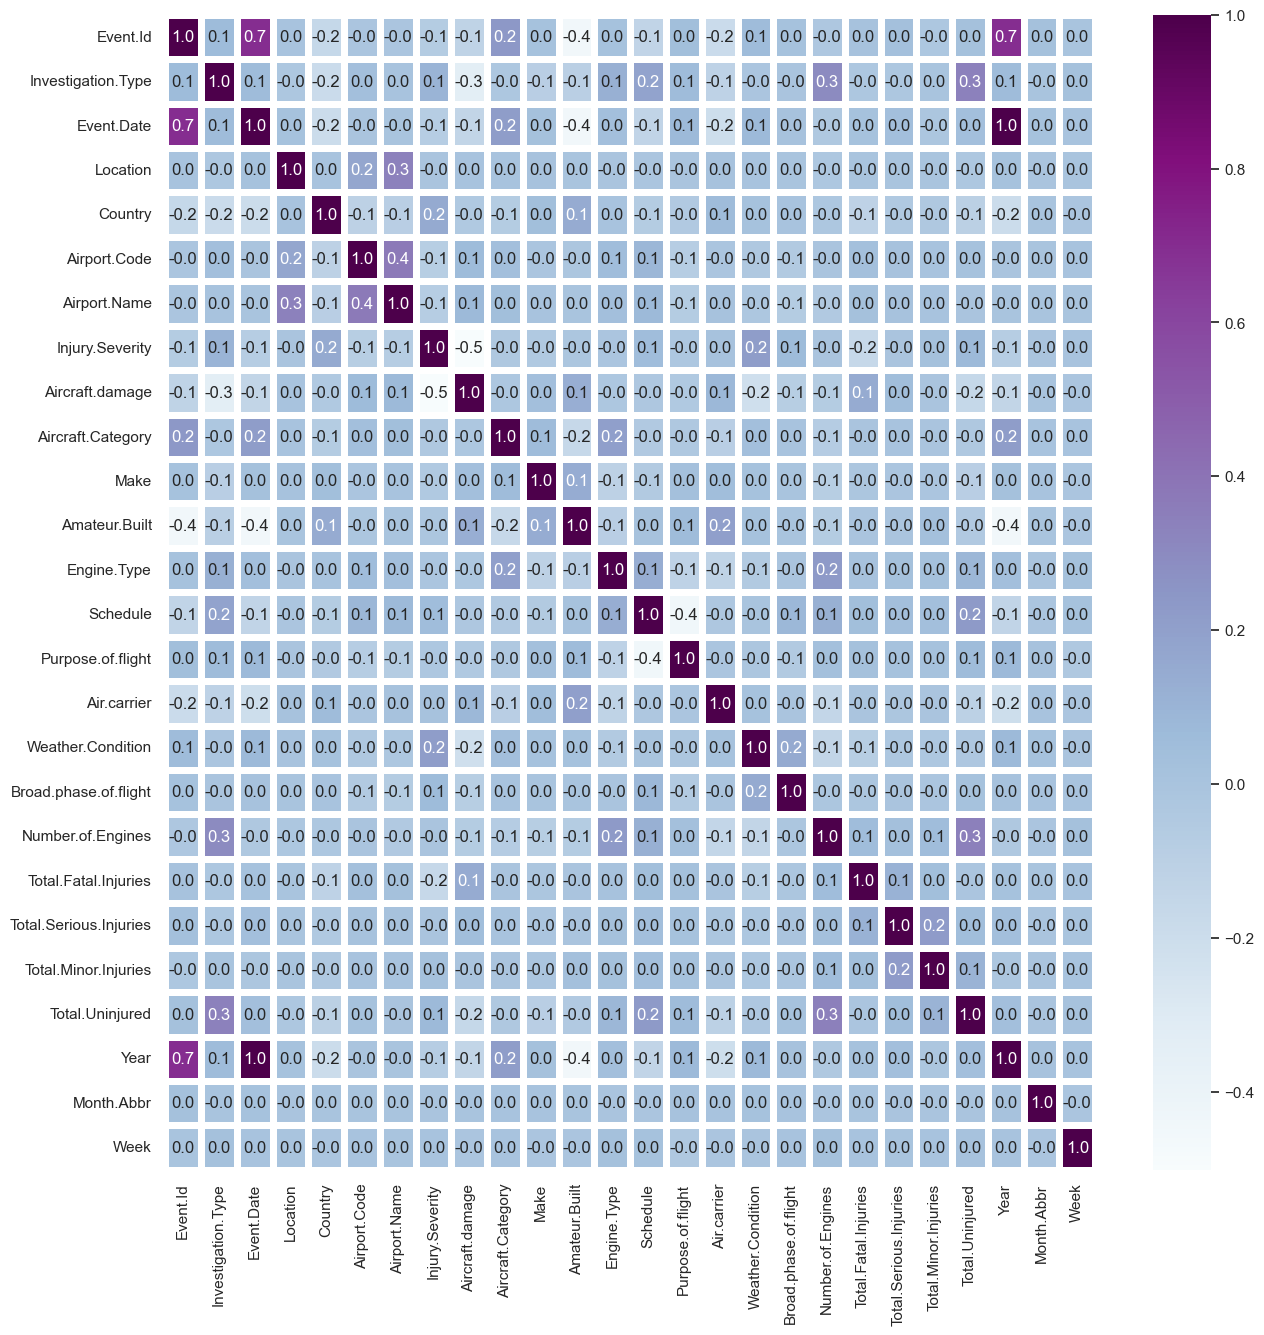

In [36]:
Correlation = Aviation.corr( )  # Calculate the correlation matrix

plt.figure(figsize=(15 , 15)) # Create a figure for the heatmap plot with a specific size


# Generate a heatmap plot using seaborn library

sns.heatmap(Correlation , annot = True, cmap = 'BuPu', linewidths = 5, fmt = '.1f', cbar = True)

    * Event.Id is highly correlated with Year 
    
        This suggests that the event identifier contains information related to the temporal aspect of the event, 
        such as the year it occurred.
        
    * Injury.Severity is highly correlated with Total.Fatal.Injuries 
    
        This implies that as the number of fatal injuries increases, the severity of injuries tends to be higher
    
    * Purpose.of.flight is highly correlated with Schedule 
    
        This suggests that the purpose of the flight can influence or determine the schedule of the flight.
    
    * Aircraft.damage is highly correlated with Investigation.Type 
    
        This suggests that the severity or type of damage can influence the chosen investigation approach.
    
    * Amateur.Built is highly correlated with Event.Id  
    
        This implies that the event identifier may contain information related to whether the incident involved an 
        amateur-built aircraft.
    

### OUTLIERS 

    * Outliers are data points that deviate significantly from the majority, and it is important to address them 
      because they can distory statistical analyses, affect model accuracy, and introduce bias in decision-making.
      
    * Ways to identify outliers :
        
        1. Boxplots
        
        2. Histograms
        
        3. Scatter plots
        
        4. Z-score 
        
          Calculate the z-score for each data point and consider values beyond a certain threshold (e.g., ±3) as outliers.

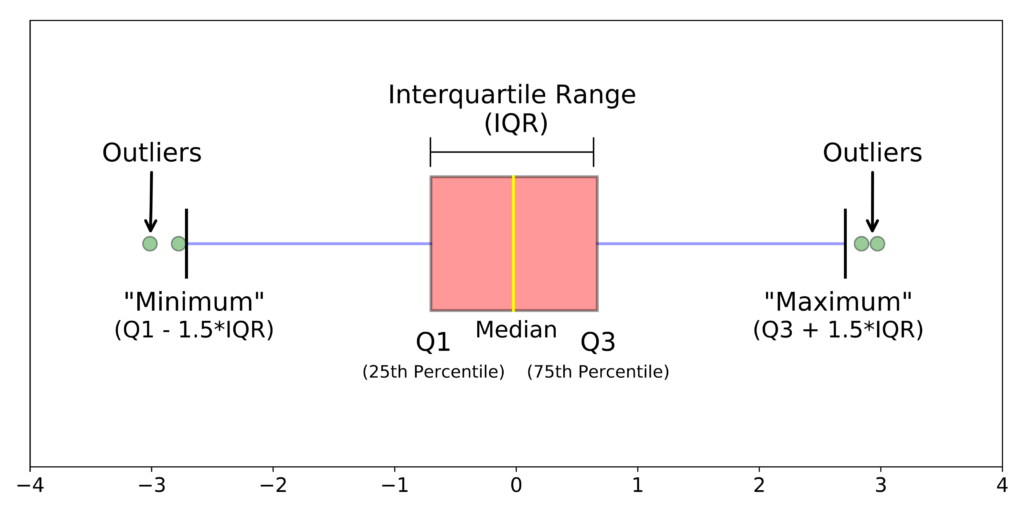

#### GRAPHICAL REPRESENTATION

        >> The following graphs are the box plots of select few columns which have the most number of outliers,

        >> The columns have been selected manually.

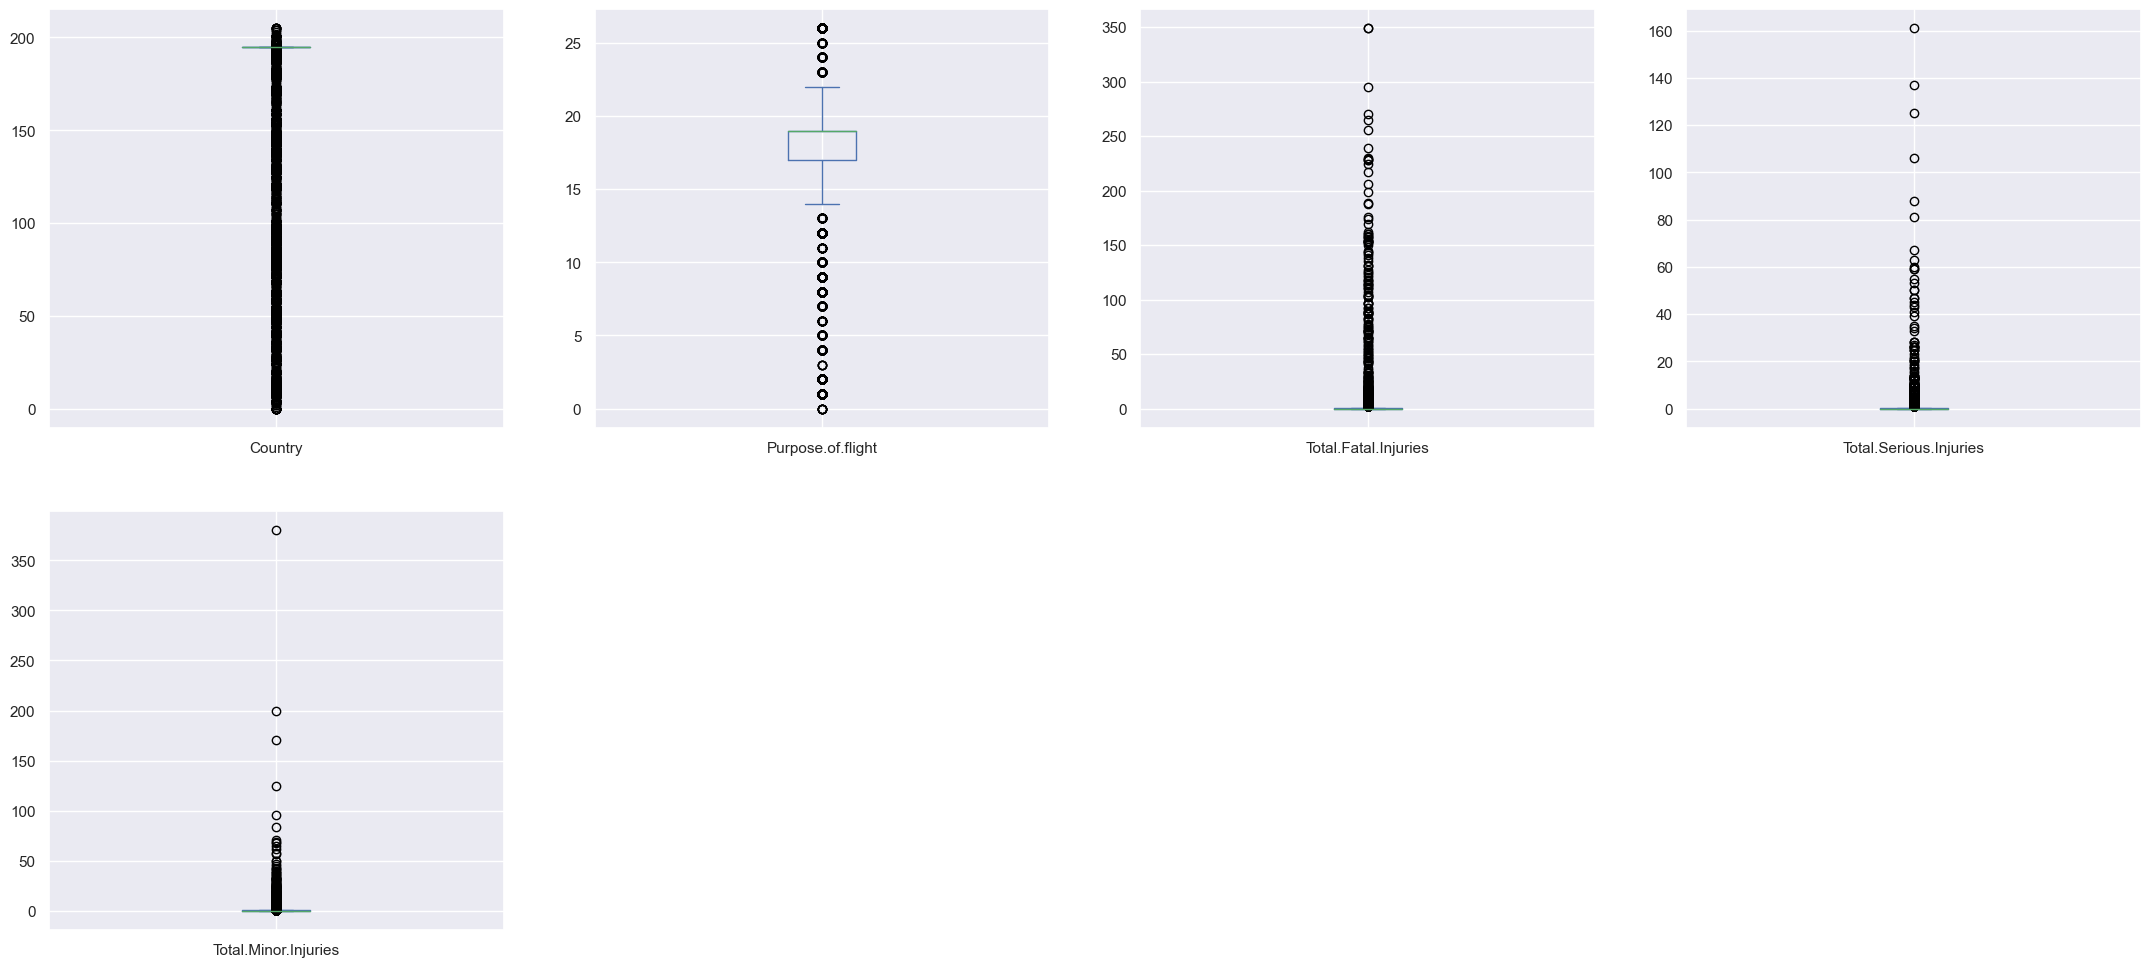

In [37]:
Aviation.iloc[ : , [ 4 , 14 , 19 , 20 , 21 ] ].plot( kind = "box", subplots = True, layout = ( 4 , 4 ), figsize = ( 27 , 25 ) ,sharex = False, sharey = False);

#### TREATMENT

     * Treating outliers in discrete data involves different approaches compared to continuous data. 
     
     * Since discrete data consists of distinct and limited values, outliers can have different implications and require
       specific treatment methods. 
       
         * Deleting Outliers
         

In [38]:
Discrete_Columns = [ 'Number.of.Engines' , 'Total.Fatal.Injuries' , 'Total.Minor.Injuries' , 'Total.Serious.Injuries' , 'Total.Uninjured' ]

## Checking for outliers beyond the upper and lower quartiles and in min and max values

Aviation[Discrete_Columns].describe( )

,Number.of.Engines,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured
count,87282.000000,87282.000000,87282.000000,87282.000000,87282.000000
mean,1.137440,0.652772,0.360814,0.280921,5.311847
std,0.433648,5.148114,2.097714,1.441544,26.937712
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.652772,0.360814,0.280921,2.000000
max,8.000000,349.000000,380.000000,161.000000,699.000000


In [39]:
# Define the percentile threshold for deleting outliers

percentile_threshold = 95 

for column in Discrete_Columns:
    
    threshold = np.percentile(Aviation[column], percentile_threshold)
    
    Aviation = Aviation[Aviation[column] <= threshold]

In [40]:
## Checking for outliers beyond the upper and lower quartiles and in min and max values, after the outlier treatment 

Aviation[Discrete_Columns].describe( )

,Number.of.Engines,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured
count,74651.000000,74651.000000,74651.000000,74651.000000,74651.000000
mean,1.080575,0.329366,0.258952,0.149777,1.425432
std,0.318830,0.566906,0.496265,0.312286,1.473954
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.652772,0.360814,0.280921,2.000000
max,2.000000,2.000000,2.000000,1.000000,5.311847


## RANDOM SAMPLING

### FEATURE ENGINEERING

     Effective feature engineering can uncover hidden patterns, capture complex relationships, handle data limitations, 
     and enhance the predictive power of a model, ultimately leading to better insights and more accurate predictions.

#### FEATURE SELECTION

    Select the most relevant features that are likely to have a significant impact on the target variable.
    
    Methods Used :
    
        1. Random Forest Feature Importance
        
        2. L1 Regularization
        
        3. SelectKBest
        
        4. Recursive Feature Elimination
        
        5. Variance Inflation Factor
        

A high VIF indicates that the independent variable is highly correlated with other independent variables in the mode [multicollinearity]
    
    This can cause problems with the model, such as:

       * The model may be unstable and difficult to interpret.
    
       * The model may be sensitive to small changes in the data.
    
       * The model may have poor predictive performance.
  
  
       >> OUTLIERS & VIF VALUES
  
     - Outliers have the potential to increase the VIF values of independent variables that are correlated with them. 
    
     - This occurs because outliers can create a perception of stronger correlation between the independent variables, 
       exaggerating their actual level of correlation.

In [41]:
# Create a new DataFrame with only independent variables for variance inflation factor analysis

New_Aviation = Aviation.drop(['Event.Date'  , 'Aircraft.damage'] , axis = 1) 

# Calculate the VIF for each predictor variable

VIF_Scores = pd.DataFrame( ) 

VIF_Scores["Feature"] = New_Aviation.columns

VIF_Scores["VIF"] = [variance_inflation_factor(New_Aviation.values, i) for i in range(New_Aviation.shape[ 1 ])]

# Print the VIF scores

print(VIF_Scores)

# Set a threshold for VIF

threshold = 15

# Select features with VIF below the threshold

selected_features = VIF_Scores[VIF_Scores['VIF'] < threshold]['Feature'].values

# Create a new DataFrame with the selected features

NEW_Aviation_X = New_Aviation[selected_features]

                   Feature         VIF
0                 Event.Id    5.800781
1       Investigation.Type    1.157809
2                 Location    4.487369
3                  Country   59.053194
4             Airport.Code    9.745639
5             Airport.Name    8.709293
6          Injury.Severity   19.082714
7        Aircraft.Category    1.198063
8                     Make    2.866209
9            Amateur.Built    3.661084
10             Engine.Type   25.410182
11                Schedule    1.582812
12       Purpose.of.flight   17.520098
13             Air.carrier   28.270143
14       Weather.Condition   19.825766
15   Broad.phase.of.flight    5.110576
16       Number.of.Engines   13.664120
17    Total.Fatal.Injuries    3.604126
18  Total.Serious.Injuries    1.293747
19    Total.Minor.Injuries    1.335519
20         Total.Uninjured    2.129532
21                    Year  215.406309
22              Month.Abbr    3.578840
23                    Week    3.248972


In [42]:
# Concatenate the 'NEW_Aviation_X' and 'Aircraft.damage' columns of the 'Aviation' DataFrame 

# along the axis=1 (i.e., columns-wise concatenation)

Aviation = pd.concat([NEW_Aviation_X , Aviation['Aircraft.damage']], axis = 1 )
Aviation

,Event.Id,Investigation.Type,Location,Airport.Code,Airport.Name,Aircraft.Category,Make,Amateur.Built,Schedule,Broad.phase.of.flight,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Month.Abbr,Week,Aircraft.damage
0,45208,0,12645,7727,15407,0,6421,1,0,2,1.0,2.0,0.0,0.0,0.0,10,3,2
3,45212,0,5997,7727,15407,0,5642,1,0,2,1.0,2.0,0.0,0.0,0.0,6,3,2
7,49012,0,15796,7727,1757,0,1226,1,0,9,1.0,0.0,0.0,0.0,2.0,4,0,1
8,49011,0,5416,7553,8058,0,1226,1,0,5,2.0,0.0,0.0,0.0,2.0,4,0,1
10,49009,0,8415,7727,15407,0,5153,1,0,0,1.0,0.0,0.0,0.0,1.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87276,86361,1,13653,7727,15407,0,5153,0,0,5,1.0,0.0,0.0,0.0,0.0,2,5,1
87277,86364,0,1026,7727,15407,0,1321,0,0,5,1.0,1.0,0.0,0.0,0.0,2,5,2
87278,86368,0,969,7727,15407,0,1226,0,0,5,1.0,0.0,0.0,1.0,0.0,2,6,1
87279,86366,0,7934,7727,15407,0,1226,0,0,5,1.0,2.0,0.0,0.0,0.0,2,3,1


      MERGING THE VALUES : MINOR & SUSTAINED INTO ONE VALUE FOR BETTER PERFORMANCE ANALYSIS
      
      
      1. Minor + Sustained: 
      
          * This category can include accidents where the damage is limited to specific areas of the aircraft, such as 
            landing gear, engines, or control surfaces, and the aircraft remains largely intact. 

          * It may also include accidents with moderate damage but without complete destruction or disintegration.
          
          
      2. Destroyed: 
      
          * This category encompasses accidents where the damage is extensive and renders the aircraft irreparable or leads 
            to disintegration. 
             
          * It may include accidents involving severe fire or explosion, complete structural failure, or widespread 
            wreckage.


#### Now will convert multi class classification to binary classification 

In [43]:
Aviation['Aircraft.damage'].replace({1 : 0 , 2 : 1},inplace = True )

### TRAIN TEST SPLIT 

In [44]:
# Sampling the data set and dividing it into train and test, Further dividing it into train_X and Train_Y

Train , Test = train_test_split(Aviation , test_size = 0.2 , random_state = 42 ) 

Train_X = Train.drop(['Aircraft.damage'], axis = 1)

Train_Y = Train['Aircraft.damage']

Test_X = Test.drop(['Aircraft.damage'], axis = 1)

Test_Y = Test['Aircraft.damage']

print("The shapes of the data sets are : ")

print("\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format(Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape))

The shapes of the data sets are : 

Train >> (59720, 18) , Test >> (14931, 18)

Train_X >> (59720, 17) , Train_Y >> (59720,)

Test_X >> (14931, 17) , Test_Y >> (14931,)


In [45]:
Train_Y.value_counts()

Aircraft.damage
0    48605
1    11115
Name: count, dtype: int64

In [46]:
Train_Y.value_counts(normalize =True)*100

Aircraft.damage
0    81.388145
1    18.611855
Name: proportion, dtype: float64

## PREDICTIVE ANALYSIS

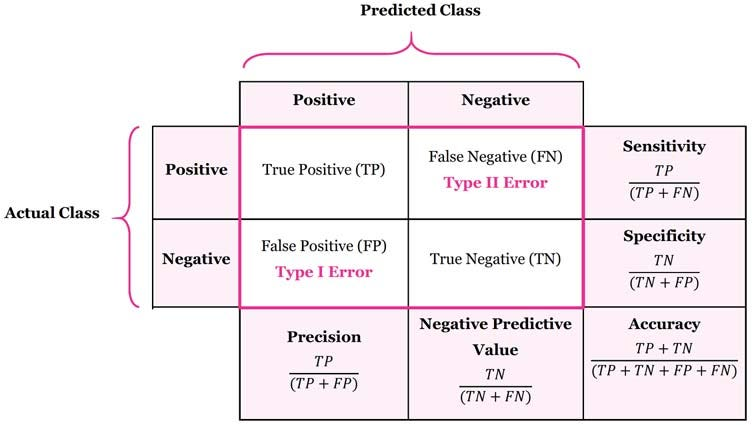

### LOGISTIC REGRESSION

In [47]:
# Fitting or Training the Logistic regression model on the train x and train y data setsabs

LR = LogisticRegression( )

LR.fit(Train_X ,Train_Y)


# Using the trained model to predict on Test data set 

Y_LR = LR.predict(Test_X)


# Evaluating the performance metrics like accuracy , precision, recall and F1 Score


# Accuracy of the LR model on test data, it tells us about the overall performance of the model

Accuracy_LR = accuracy_score(Test_Y , Y_LR) * 100 


# Precision is needed because Accuracy is easily influenced by a dominating class. about the predictive performance 

# of a classification model, specifically regarding the positive predictions made by the model.

Precision_LR = precision_score(Test_Y , Y_LR) * 100 


# Recall measures the proportion of actual positive instances (or true positives) that were correctly identified.

Recall_LR = recall_score(Test_Y , Y_LR) * 100 


# The F1 score is the harmonic mean of precision and recall, and it balances the trade-off between these two metrics.abs

# It is not affected by Class Imbalance and True Negative which usually takes up a lot of place in the classification

F1_Score_LR = f1_score(Test_Y , Y_LR) * 100


# Printing the values

print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_LR , Precision_LR , Recall_LR , F1_Score_LR) )

The performance metrics of the Test Data is : 

Accuracy = 83.65816087335075%

Precision = 70.0%

Recall = 18.245227606461086%

F1 Score = 28.945835760046595%


Text(0.5, 1.0, 'Confusion Matrix')

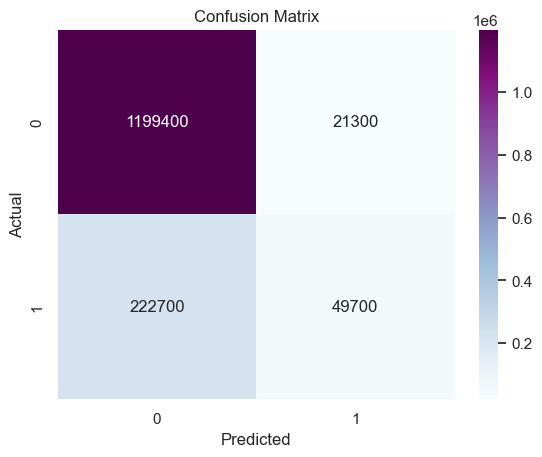

In [48]:
Confusion_Matrix_LR = confusion_matrix(Test_Y , Y_LR) * 100

sns.heatmap(Confusion_Matrix_LR , annot = True , fmt='.0f' , cmap = 'BuPu')

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

# We can see that there is a class imbalace, that is class is underrepresented.

<span class="burk">-    INFERENCE</span>

    * From the above confusion matrix we can tell that there is a significant class imbalance, mainly because of poor data 
      quality.
      
    * The recall score and precision score is alarmingly low.

    * The accuracy appears to be good, because of the dominating class 0.

<span class="birk">-  REASONS</span>

    * Class Imbalance
    
        - Complex Data
        
        - Natural Occurrence 
        
        - Errors during labeling process
        
    * Class Misclassification
    
        - Irrelevant Features
        
        - Inconsistent Data
        
        - Class Imbalance
        
        - Poor Data Quality
        
<span class="girk">- SOLUTION</span>

    * Class Imbalance
    
        - Boosting
        
        - Over Sampling
        
        - Under Sampling
        
        - Data Re-sampling
    
    * Misclassification
    
        - Feature Engineering
        
            > Feature Scaling
        
        - Hyper parameter tuning
        
        - Boosting
        

#### CHECKING FOR OVERFITTING 

    - By comparing the training and testing accuracy scores, you can get an indication of over fitting. 
    
    - If the training accuracy is significantly higher than the testing accuracy, it could suggest that the model is over
      fitting to the training data.

In [49]:
train_predictions = LR.predict(Train_X)

test_predictions = LR.predict(Test_X)

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100

# If the values are close by or in the same vicinity then there is no overfitting ocurrinabsg

print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 83.53315472203617

Test Accuracy >> 83.65816087335075


### UNDER SAMPLING 

RandomUnderSampler is a technique used to address class imbalance in a dataset by randomly reducing the number of samples in the majority class, creating a more balanced dataset and potentially improving the model's ability to predict the minority class accurately.


In [50]:
# Create the under samplier instance 

undersampler = RandomUnderSampler( random_state = 42 )

# Undersample the majority class

Train_X, Train_Y = undersampler.fit_resample(Train_X , Train_Y)

Test_X, Test_Y = undersampler.fit_resample(Test_X , Test_Y)

print ( "\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format ( Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape) )


Train >> (59720, 18) , Test >> (14931, 18)

Train_X >> (22230, 17) , Train_Y >> (22230,)

Test_X >> (5448, 17) , Test_Y >> (5448,)


In [51]:
display(Train_Y.value_counts( ))

Test_Y.value_counts( )

Aircraft.damage
0    11115
1    11115
Name: count, dtype: int64

Aircraft.damage
0    2724
1    2724
Name: count, dtype: int64

### DECISION TREE

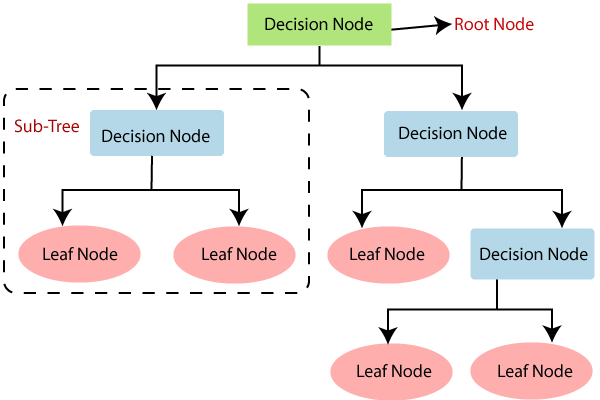

#### HYPER PARAMETER TUNING

        * CV = Cross-validation is a re-sampling technique used to assess the performance of a model on an independent 
          dataset.
        
        
        * It involves splitting the available data into multiple subsets or folds, training the model on a subset of the 
          data, and evaluating its performance on the remaining fold. 
        
        
        * The choice of the value for "k" determines how the data is partitioned. Common values for "k" include 5, 10, or 
          even higher values.
        
        * The number of folds or subsets used in cross-validation is denoted by "k" and is often referred to as k-fold 
          cross-validation. 

In [52]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    
    'criterion': ['gini', 'entropy'],
    
    'max_depth': [ 5, 10, 15, 20],
    
    'min_samples_split': [ 5, 10],
    
 }


# Initializing the algorithm

DT = DecisionTreeClassifier()


# Performing grid search, which finds the appropriate parameter iteratively.

grid_search = GridSearchCV( DT, Parameters, cv = 5 )

grid_search.fit(Train_X ,Train_Y)

Params = grid_search.best_params_

# Printing the best parameters 

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

Best Accuracy Score:  0.8238416554206027


#### TEST

In [53]:
# Initializing Decision Tree Algorithm with the best parameters

DT = DecisionTreeClassifier(**Params)


# Training the decision tree algorithm on train data

DT.fit(Train_X ,Train_Y)


# Predicting the target variables on unseen data / test data

threshold = 0.333

Y_DT = DT.predict_proba(Test_X)[:, 1] >= threshold

# Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_DT = accuracy_score( Test_Y , Y_DT ) * 100 

Precision_DT = precision_score ( Test_Y , Y_DT ) * 100 

Recall_DT = recall_score ( Test_Y , Y_DT ) * 100

F1_Score_DT = f1_score ( Test_Y , Y_DT ) * 100

print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {} %\n\nPrecision = {} %\n\nRecall = {} %\n\nF1 Score = {} %".format ( Accuracy_DT  , Precision_DT  , Recall_DT  , F1_Score_DT ) )

The performance metrics of the Test Data is : 

Accuracy = 80.56167400881057 %

Precision = 78.1916694886556 %

Recall = 84.76505139500733 %

F1 Score = 81.34578122247666 %


Text(0.5, 1.0, 'Confusion Matrix')

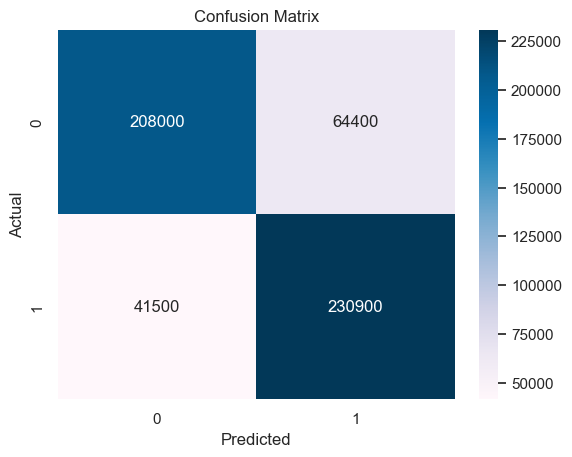

In [54]:
Confusion_Matrix_DT = confusion_matrix ( Test_Y , Y_DT ) * 100

sns.heatmap ( Confusion_Matrix_DT , annot = True , fmt='.0f' , cmap = 'PuBu' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

<span class="burk">-    INFERENCE</span>

    * From the above confusion matrix we can tell that there is an improvement in Precision and Recall score 

    * But the class imbalance problem and misclassification still persists.

    * The overall accuracy appears to be good, because of the dominating class 0.
    
    * But there is a chance that the model has memorized the patterns instead of learning them resulting in Over fitting
    
    
<span class="birk">- REASONS</span>

    * Complex Model Architecture 
    
    * Lack of regularization
    
    * Imbalanced Data
    
    
<span class="girk">- SOLUTION</span>

    * Cross Validation
    
    * Feature Selection
    
    * Regularization
    
    * Model Simplification
    
    * Boosting


#### CHECKING FOR OVERFITTING 

In [55]:
# Predict the labels for the training set using the Decision Tree model

train_predictions = DT.predict(Train_X)


# Predict the labels for the test set using the Decision Tree  model

test_predictions = DT.predict(Test_X)


# Calculate the accuracy of the Decision Tree  model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the Decision Tree model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 82.6855600539811

Test Accuracy >> 82.03010279001468


### RANDOM FOREST

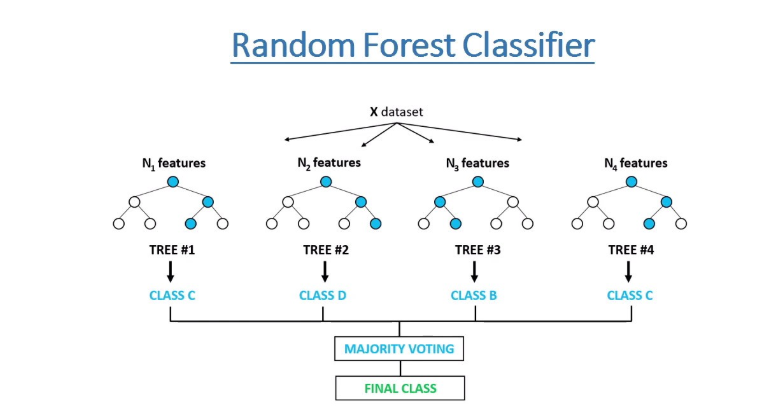

#### HYPER PARAMETER TUNING

#### Grid Search takes lot of time to process

In [ ]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    
    'n_estimators': [ 100 , 300 , 500 ], # Number of trees in the forest
    
    'max_depth': [None, 5 , 10 , 15 ], # Maximum depth of each tree
    
    'min_samples_split': [ 5 , 10 , 15]  # Minimum number of samples required to split an internal node    
}

# Create a RandomForestClassifier instance

RF = RandomForestClassifier ( )


# Perform grid search with cross-validation

grid_search = GridSearchCV ( RF, Parameters, cv = 5)

grid_search.fit ( Train_X ,Train_Y )

Params = grid_search.best_params_

# Training model for each combination of the parameters

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

#### TEST

In [58]:
# Create a Random Forest classifier with specified hyperparameters

RF = RandomForestClassifier ( **Params )


# Train the Random Forest classifier on the training data

RF.fit ( Train_X ,Train_Y )


# Use the trained classifier to predict the labels for the test data

Y_RF = RF.predict ( Test_X )

threshold = 0.333

Y_RF = RF.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_RF = accuracy_score( Test_Y , Y_RF ) * 100 

Precision_RF = precision_score ( Test_Y , Y_RF ) * 100 

Recall_RF = recall_score ( Test_Y , Y_RF ) * 100

F1_Score_RF = f1_score ( Test_Y , Y_RF ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_RF  , Precision_RF  , Recall_RF  , F1_Score_RF ) )

The performance metrics of the Test Data is : 

Accuracy = 80.85535976505139%

Precision = 78.2331205911992%

Recall = 85.4992657856094%

F1 Score = 81.70496404139624%


Text(0.5, 1.0, 'Confusion Matrix')

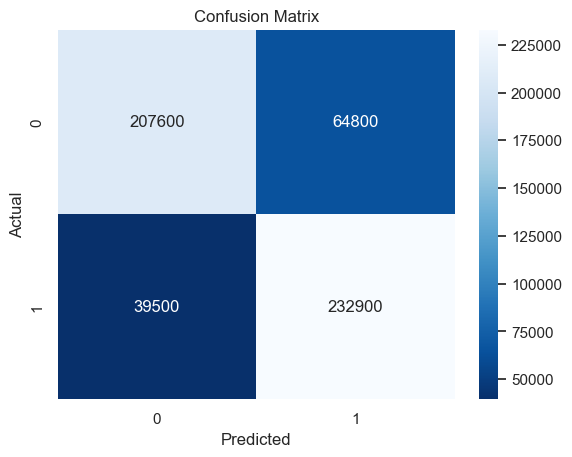

In [59]:
Confusion_Matrix_RF = confusion_matrix ( Test_Y , Y_RF ) * 100

sns.heatmap ( Confusion_Matrix_RF , annot = True , fmt='.0f' , cmap = 'Blues_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )


<span class="burk">-    INFERENCE</span>

    * Although there is a significant improvement in Precision, Accuracy and Recall scores the main problem that has arose 
      is the problem of over fitting 
      
    * The model performs well on training data but not on unseen data
    
    
<span class="birk">- REASONS</span>

    * Complex Model Architecture 
    
    * Lack of regularization
    
    * Imbalanced Data
    
    
<span class="girk">- SOLUTION</span>

    * Cross Validation
    
    * Feature Selection
    
    * Regularization
    
    * Model Simplification
    
    * Boosting


#### CHECKING FOR OVERFITTING 

        * THE MODEL SEEMS TO BE HAVE OVER FIT

In [60]:
# Predict the labels for the training set using the Random Forest model

train_predictions = RF.predict(Train_X)


# Predict the labels for the test set using the Random Forest model

test_predictions = RF.predict(Test_X)

# Calculate the accuracy of the Random Forest model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the Random Forest model on the valiidation set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 82.58659469185785

Test Accuracy >> 82.36049926578562


### ENSEMBLE TECHNIQUES : BOOSTING

        Boosting is an iterative ensemble technique that combines weak models to create a strong model. 
        
        Each model in the ensemble is trained to correct the mistakes made by the previous models.
        
        Techniques :
        
            
            1. Gradient Boosting Machines (GBM)
            
            2. Extreme Gradient Boosting (XGBoost)
            
            3. LightGBM
            
            4. CatBoost 
            
        
        What do Boosting Techniques do ?
        
           * Over fitting: Boosting algorithms, such as AdaBoost and Gradient Boosting Machines (GBM), are used to reduce 
             over fitting
             
           * Boosting algorithms inherently focus on improving the performance on challenging instances and adjusting the 
             model to minimize errors. 
           
           * This adaptive learning process makes them particularly effective in handling over fitting and class imbalance 
             problems. 

#### ADAPTIVE BOOSTING

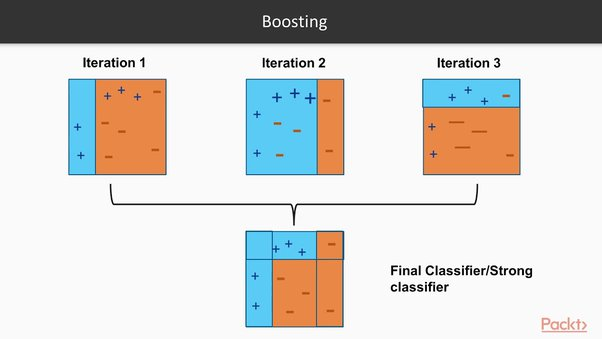

##### TUNING & INITIALIZATION

In [62]:
# Create a Random Forest classifier with best hyperparameters obtained from grid search

RF = RandomForestClassifier ()

# Create an AdaBoost classifier with Random Forest as the base estimator

AB = AdaBoostClassifier(RF)

##### TRAINING & TESTING

In [ ]:
# Create an AdaBoost classifier with Random Forest as the base estimator

AB = AdaBoostClassifier(RF)


# Fit the AdaBoost classifier on the training data

AB.fit(Train_X ,Train_Y)


# Make predictions on the test data using the trained AdaBoost classifier

Y_AB = AB.predict(Test_X)


# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_AB = accuracy_score(Test_Y , Y_AB) * 100 

Precision_AB = precision_score(Test_Y , Y_AB) * 100 

Recall_AB = recall_score(Test_Y , Y_AB) * 100

F1_Score_AB = f1_score(Test_Y , Y_AB) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_AB , Precision_AB , Recall_AB , F1_Score_AB ) )

In [ ]:
Confusion_Matrix_AB = confusion_matrix ( Test_Y , Y_AB ) * 100

sns.heatmap ( Confusion_Matrix_AB , annot = True , fmt='.0f' , cmap = 'OrRd_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )


<span class="burk">-    INFERENCE</span>

    * The ensemble technique : Adaptive boost has really improved the model. 
    
    * The problem of class imbalance hasn't been completely eradicated yet, but there is a significant improvement in 
      classification. 
      
    * The over all performance has increased all while mitigating over fitting. 


##### CHECKING FOR OVERFITTING 

In [ ]:
# Predict the classes for the training set using KNN classifier

train_predictions = AB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = AB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

#### GRADIENT BOOSTING

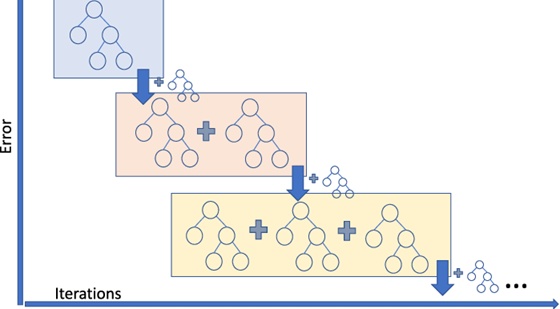

##### TUNING & INITIALIZATION

In [ ]:
# Create a Gradient Boosting Classifier object

GB = GradientBoostingClassifier( )


# Define the hyperparameter grid for tuning

Parameters = {
    
    'learning_rate': [0.1, 0.001],
    
    'n_estimators': [200, 500],
    
    'max_depth': [3 , 5]
    
}

# Perform grid search cross-validation to find the best hyperparameters

grid_search = GridSearchCV ( GB , Parameters )

grid_search.fit ( Train_X , Train_Y )


# Print the best hyperparameters and the corresponding accuracy score

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

Params = grid_search.best_params_

# Evaluate the model with the best hyperparameters on the test set

best_model = grid_search.best_estimator_

accuracy = best_model.score( Test_X, Test_Y )

print("\nTest Accuracy: ", accuracy)

##### TRAINING & TESTING

In [ ]:
# Create an Gradient Boosting classifier with obtained hyper parameters

GB = GradientBoostingClassifier ( **Params )


# Fit the AdaBoost classifier on the training data

GB.fit ( Train_X ,Train_Y )

# Make predictions on the test data using the trained AdaBoost classifier

Y_GB = GB.predict ( Test_X )

threshold = 0.333

Y_GB = GB.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_GB = accuracy_score( Test_Y , Y_GB ) * 100 

Precision_GB = precision_score ( Test_Y , Y_GB ) * 100 

Recall_GB = recall_score ( Test_Y , Y_GB ) * 100

F1_Score_GB = f1_score ( Test_Y , Y_GB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_GB , Precision_GB , Recall_GB , F1_Score_GB ) )

##### CHECKING FOR OVERFITTING 

In [ ]:
# Predict the classes for the training set using KNN classifier

train_predictions = GB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = GB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

In [ ]:
Confusion_Matrix_GB = confusion_matrix ( Test_Y , Y_GB ) * 100

sns.heatmap ( Confusion_Matrix_GB , annot = True , fmt='.0f' , cmap = 'RdGy' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

<span class="burk">-    INFERENCE</span>

    * We can see that False Positive Rate has decreased from previous confusion matrix
    
    * The misclassification problem seems to have improved.
    
    * True Negative is still dominating the matrix and is a major contributor to performance metrics


#### EXTREME GRADIENT BOOSTING

##### TUNING & INITIALIZATION

In [ ]:
# Define the parameter grid for tuning

Parameters = {
    
    'n_estimators': [100, 200, 300],  # Number of trees
    
    'learning_rate': [ 0.5 , 0.1, 0.01, 0.001],  # Step size shrinkage
    
    'max_depth': [3, 5, 7]  # Maximum depth of a tree
    
}

# Initialize the XGBoost classifier

XGB = XGBClassifier( random_state = 42 )


# Perform grid search with cross-validation

grid_search = GridSearchCV( estimator = XGB, param_grid = Parameters, cv = 5 )

grid_search.fit(Train_X, Train_Y)


# Print the best parameters and best score

print("Best Parameters: ", grid_search.best_params_)

print("\nBest Score: ", grid_search.best_score_)

Params = grid_search.best_params_

# Evaluate the tuned model on the test set

accuracy = grid_search.best_estimator_.score( Test_X , Test_Y)

print("\nTest Set Accuracy: ", accuracy)


##### TRAINING & TESTING

In [ ]:
# Create an Extreme Gradient Boosting classifier with obtained hyper parameters

XGB = GradientBoostingClassifier ( **Params )


# Fit the Extreme Gradient Boosting classifier on the training data

XGB.fit ( Train_X ,Train_Y )


# Make predictions on the test data using the trained Extreme Gradient Boosting##### TRAINING & TESTING

Y_XGB = XGB.predict ( Test_X )

threshold = 0.333

Y_XGB = XGB.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_XGB = accuracy_score( Test_Y , Y_XGB ) * 100 

Precision_XGB = precision_score ( Test_Y , Y_XGB ) * 100 

Recall_XGB = recall_score ( Test_Y , Y_XGB ) * 100

F1_Score_XGB = f1_score ( Test_Y , Y_XGB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_XGB , Precision_XGB , Recall_XGB , F1_Score_XGB ) )

In [ ]:
Confusion_Matrix_XGB = confusion_matrix ( Test_Y , Y_XGB ) * 100

sns.heatmap ( Confusion_Matrix_XGB , annot = True , fmt='.0f' , cmap = 'gnuplot2' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

<span class="burk">-    INFERENCE</span>

    * We can see that False Positive Rate has decreased from previous confusion matrix
    
    * The misclassification problem seems to have improved.
    
    * True Negative is still dominating the matrix and is a major contributor to performance metrics


##### CHECKING FOR OVERFITTING 

In [ ]:
# Predict the classes for the training set using KNN classifier

train_predictions = XGB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = XGB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

#### CATEGORICAL BOOST

##### TUNING & INITIALIZATION

In [ ]:
# Define the parameter grid for tuning

Parameters = {
    
    'learning_rate': [0.01, 0.1, 0.5],
    
    'depth': [4, 6, 8],
    
    'l2_leaf_reg': [1, 3, 5]
    
}

# Create a CatBoost classifier

CB = CatBoostClassifier(  )


# Perform grid search with cross-validation

grid_search = GridSearchCV ( estimator = CB, param_grid = Parameters, cv = 5 )

grid_search.fit ( Train_X, Train_Y )


# Print the best parameters and best score

print("Best Parameters: ", grid_search.best_params_)

print("\nBest Score: ", grid_search.best_score_)


# Evaluate the best model on the test set

best_model = grid_search.best_estimator_

Params = grid_search.best_params_

accuracy = best_model.score( Test_X, Test_Y )

print("\nTest Accuracy: ", accuracy)


##### TRAINING & TESTING

In [ ]:
# Create an Categorical Boosting classifier with obtained hyper parameters

CB = CatBoostClassifier ( **Params )


# Fit the Categorical Boosting classifier on the training data

CB.fit ( Train_X ,Train_Y )


# Make predictions on the test data using the trained Categorical Boosting##### TRAINING & TESTING classifier

Y_CB = CB.predict ( Test_X )


# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_CB = accuracy_score( Test_Y , Y_CB ) * 100 

Precision_CB = precision_score ( Test_Y , Y_CB ) * 100 

Recall_CB = recall_score ( Test_Y , Y_CB ) * 100

F1_Score_CB = f1_score ( Test_Y , Y_CB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_CB , Precision_CB , Recall_CB , F1_Score_CB ) )

In [ ]:
Confusion_Matrix_CB = confusion_matrix ( Test_Y , Y_CB ) * 100

sns.heatmap ( Confusion_Matrix_CB , annot = True , fmt='.0f' , cmap = 'rocket_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

##### CHECKING FOR OVERFITTING 

In [ ]:
# Predict the classes for the training set using KNN classifier

train_predictions = CB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = CB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

## COMPARING THE MODELS

In [ ]:
# Classification algorithm names

algorithm_names = ['Logistic Regression With L2 Penalty', 'Decision Tree', 'Random Forest', 'AdaBoost' , 'Gradient Boosting' , 'Extreme Gradient Boosting' , 'CatBoost' ]


# Accuracy scores

accuracy_scores = [ Accuracy_LR , Accuracy_DT , Accuracy_RF ,  Accuracy_AB , Accuracy_GB , Accuracy_XGB , Accuracy_CB ]


# Precision scores

precision_scores = [ Precision_LR , Precision_DT , Precision_RF ,   Precision_AB , Precision_GB , Precision_XGB , Precision_CB ]


# Recall scores

recall_scores = [ Recall_LR , Recall_DT , Recall_RF , Recall_AB , Recall_GB , Recall_XGB , Recall_CB ]


# Plotting the scores

plt.figure( figsize = ( 20 , 15 ) )


# Accuracy scores plot

plt.plot(algorithm_names, accuracy_scores, label='Accuracy', marker='o', color='#42253B')

for i in range(len(algorithm_names)):
    
    plt.text(algorithm_names[i], accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
    

# Precision scores plot

plt.plot( algorithm_names, precision_scores, label='Precision', marker='o', color='#9E4770')

for i in range ( len( algorithm_names ) ):
    
    plt.text( algorithm_names [ i ] , precision_scores[ i ], f'{precision_scores[i]:.2f}', ha='center', va='bottom')
    

# Recall scores plot

plt.plot(algorithm_names, recall_scores, label='Recall', marker='o', color='#003459')

for i in range(len(algorithm_names)):
    
    plt.text(algorithm_names[i], recall_scores[i], f'{recall_scores[i]:.2f}', ha='center', va='bottom')
    




# Labeling the axes and title

plt.xlabel( 'Classification Algorithms' )

plt.ylabel( 'Scores' )

plt.title( 'Performance Comparison' )


# Adding a legend

plt.legend()


# Rotating the x-axis labels for better visibility

plt.xticks( rotation = 45 )


# Displaying the plot

plt.show ( )


    * PERFORMANCE ANALYSIS OF THE ALGORITHMS
    
        - Good Performance
        
            > Decision Tree
            
            > Random Forest
            
            > Adaptive Boosting 
           
            > Gradient Boosting 
            
            > Extreme Gradient Boosting
            
            > Categorical Boost
            
        - Recall tells us the rate at which the algorithm correctly predicts Aircraft damage severity.

In [ ]:
Performance = pd.DataFrame ( index = algorithm_names )

Performance [ "Accuracy" ] = accuracy_scores 

Performance [ "Precision" ] = precision_scores

Performance [ "Recall" ] = recall_scores

Performance

### AUROC CURVE

    * AUROC curve is a way to evaluate the performance of a classification model, which predicts whether something belongs 
      to a certain category or not. 
      
    * The AUROC curve measures how well a model can distinguish between the positive class and the negative class. 
    
    * The True Positive Rate (also called Sensitivity or Recall) represents the proportion of actual positive cases 
      correctly classified as positive by the model.
      
    * The False Positive Rate represents the proportion of actual negative cases incorrectly classified as positive by the
      model.
      
    * The AUROC value ranges from 0 to 1, where a value of 0.5 represents a random classifier, and a value of 1 represents 
      a perfect classifier. The higher the AUROC value, the better the model's ability to distinguish between the positive 
      and negative classes.
      
    * The AUROC value is calculated as the area under the AUROC curve. A larger area under the curve indicates better model
      performance.
      
    * When the False Positive Rate (FPR) increases drastically after a certain point in the AUROC (Area Under the Receiver
      Operating Characteristic) curve, it indicates that the model's ability to distinguish between the positive and
      negative classes deteriorates rapidly as the classification threshold is lowered.
      

In [ ]:
# Calculate AUROC score using roc_auc_score function

AUROC_Score = roc_auc_score( Test_Y , Y_RF )


# Predict probabilities using XGBoost's predict_proba function

Predicted_Prob = XGB.predict_proba ( Test_X )


# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and Threshold values using roc_curve function

FPR, TPR, Threshold = roc_curve( Test_Y, Predicted_Prob [ : , 1 ] )


# Plot the ROC curve using FPR and TPR

plt.style.use( "seaborn-dark" )

plt.figure ( figsize = ( 15 , 7 ) )

sns.set( style = 'darkgrid' )

plt.plot( FPR , TPR )


# Set the x-axis label

plt.xlabel( "FPR" )


# Set the y-axis label

plt.ylabel( "TPR" )


# Set the title of the plot

plt.title( "AUROC of AVIATION ACCIDENT DAMAGE" )


# Add text to the plot indicating the AUROC score

plt.text( x = 0.3, y = 0.5, s = "ROC VALUE IS: {}".format ( AUROC_Score ) )

plt.show ( )

<span class="pirk">- INFERENCE</span>    
    
    * An AUROC (Area Under the Receiver Operating Characteristic) curve area of 0.8233 indicates the overall performance of 
      a binary classifier in terms of its ability to discriminate between positive and negative instances
    
    * The AUROC curve summarizes the trade-off between the true positive rate (sensitivity or recall) and the false 
      positive rate (1 - specificity) at different classification thresholds. 
    
    * The higher the AUROC curve area, the better the classifier is at achieving a high true positive rate while keeping 
      the false positive rate low.
    
    

## INTERPRETATION FOR BUSINESS

### WEATHER & AIRCRAFT ACCIDENTS

    * During the Exploratory Data Visualization, it has been noticed that the accidents occur mostly during the summer 
      season. 

      > Implement rigorous maintenance and inspection protocols for aircraft components that are more susceptible to 
        summer-related issues, such as engine overheating or air conditioning system failures. 
      
      > Conduct thorough checks on critical systems to ensure their proper functioning during hot weather conditions.
      
      > Continuously analyze accident data specific to the summer season to identify patterns or recurring factors that
        contribute to incidents. Use this information to drive improvements in training, procedures, and safety protocols.

### PHASE OF FLIGHT & ACCIDENTS

    * We can see that the maximum number of accidents occur during the Landing phase and Take off phase, followed by
      cruise, maneuvering and approach.
      
        > Ensure that runways and approach paths are properly maintained and designed to meet safety standards. 
        
        > This may involve regular inspections, repairs, and updates to runway lighting, and markings to enhance 
          visibility and minimize potential hazards.
          
        >  Establish and enforce standardized procedures for takeoff and landing operations, including communication
           protocols between pilots and air traffic controllers.

### ENGINE TYPE & ACCIDENTS

    * Maximum number of fatalities are associated with the Reciprocating engine type followed by Turbofan engines.
    
        > Explore the possibility of upgrading reciprocating engines and turbo fans with advanced technologies that improve
          safety, reliability, and performance. 
          
        > This may involve retrofitting existing aircraft or considering engine upgrades when procuring new aircraft.
        
        > Conduct a comprehensive risk assessment and analysis of aircraft accidents associated with reciprocating engines 
          and turbo fans. 
        
        > Identify common patterns or factors contributing to accidents and fatalities. 
        
        > Enhance training programs for pilots, crew members, and ground staff to raise awareness about the specific 
          challenges and risks associated with reciprocating engines and turbo fans. 